## Objetivo:
# Preparar y limpiar los datos de vehículos BMW usados para futuros análisis y modelos predictivos que ayuden a los concesionarios a optimizar su inventario y estrategias de venta, identificando qué coches mantener en stock y cómo ajustar precios para maximizar beneficios.

# Importación de Librerías y Configuración


In [270]:
!pip install graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from graphviz import Source
from sklearn.pipeline import Pipeline



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Carga y Exploración Inicial del Dataset de bmw_original


In [271]:
bmw_original = pd.read_csv("bmw_pricing_v3.csv")

In [272]:
bmw_original.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


Verificamos que no hay duplicados en el dataset:

In [273]:
#Verificamos si hay duplicados en el dataset:
bmw_original[bmw_original.duplicated(keep='first')]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


Hacemos un .info para obtener información sobre el tipo de datos.

Inicialmente, observamos que hay:

*   **Variables categóricas**: marca, modelo, fecha_registro, tipo_gasolina, color, tipo_coche, volante_regulable, aire_acondicionado, camara_trasera, asientos_traseros_plegables, elevalunas_electrico, bluetooh,alerta_lim_velocidad,fecha_venta
*   **Variables numéricas**: km, potencia, precio
*   **Variables boleanas**: gps




In [274]:
bmw_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

*Observaciones* a tener en cuenta:


*   Algunas variables categóricas podemos codificarlas en boleanas, ya que toman valores de True o False. Son las siguientes:

  1.   volante_regulable
  2.   aire_acondicionado
  1.   camara_trasera
  2.   asientos_traseros_plegables
  1.   elevalunas_electrico
  1.   bluetooth
  2.   alerta_lim_velocidad
*   fecha_registro y fecha_venta podrían convertirse a formato de fecha (datetime).




Transformamos las columnas fecha_registro y fecha_venta a datatime con pd.to_datatime

In [275]:
for col in ["fecha_registro", "fecha_venta"]:
  bmw_original[col] = pd.to_datetime(bmw_original[col])

In [276]:
bmw_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4398 non-null   object        
 7   tipo_coche                   3383 non-null   object        
 8   volante_regulable            4839 non-null   object        
 9   aire_acondicionado           4357 non-null   object        
 10  camara_trasera               4841 non-null   object        
 11  asientos_traseros_plegables  1452 non-null 

In [277]:
bmw_original.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


Creamos la variable antigüedad restando las columnas fecha_venta y fecha_registro y la expresamos en años


In [278]:
bmw_original['antiguedad'] = (bmw_original['fecha_venta'] - bmw_original['fecha_registro']).dt.days / 365.25

In [279]:
bmw_original.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,antiguedad
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01,5.916496
1,BMW,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01,NaN
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01,5.837098
3,BMW,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01,NaN
4,BMW,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01,NaN


In [280]:
#Las columnas del dataset son:
bmw_original.columns

Index(['marca', 'modelo', 'km', 'potencia', 'fecha_registro', 'tipo_gasolina',
       'color', 'tipo_coche', 'volante_regulable', 'aire_acondicionado',
       'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico',
       'bluetooth', 'gps', 'alerta_lim_velocidad', 'precio', 'fecha_venta',
       'antiguedad'],
      dtype='object')

### ANÁLISIS INICIAL DE COLUMNAS

#### Columna MARCA

In [281]:
#Observamos los valores que se toman en la columna MARCA. Todos son BMW o nulos.
bmw_original["marca"].value_counts(dropna=False)

marca
BMW    3873
NaN     970
Name: count, dtype: int64

Estamos analizando datos sobre coches cuya marca es BMW. Por tanto, aunque la columna contenga nulos, asumimos que TODOS los coches son marca BMW, ya que estamos trabajando con esta marca.

Esta columna no aporta variabilidad ni poder explicativo al modelo.

Podemos eliminarla.





#### Columna KM

In [282]:
#Filas que tengan nulos en la columna km

bmw_original[bmw_original['km'].isnull()]

#Solamente hay dos nulos en la columna km. Decidimos no eliminar la columna ya que, probablemente, guarde una especial relación con el target.
#Lo analizaremos más adelante.

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,antiguedad
459,BMW,520,NaN,135.0,2012-12-01,diesel,black,NaN,True,True,True,False,True,True,True,True,20300.0,2018-02-01,5.169062
4811,BMW,X3,NaN,190.0,NaT,diesel,blue,van,True,True,True,True,True,False,True,True,19500.0,2018-07-01,NaN


#### Columna POTENCIA

In [283]:
bmw_original[bmw_original['potencia'].isnull()]

#Tampoco eliminamos la columna potencia por la misma razón.

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,antiguedad
181,BMW,525,106054.0,NaN,2014-05-01,diesel,black,estate,False,True,False,NaN,False,False,True,True,18700.0,2018-03-01,3.832991


#### Columna FECHA_REGISTRO

In [284]:
print(f"Nulos en la columna fecha_registro:",bmw_original['fecha_registro'].isnull().sum())
print(f"Porcentaje de nulos en fecha_registro:",round(bmw_original['fecha_registro'].isnull().sum()/len(bmw_original)*100,2),"%")

#La columna fecha_registro tiene 2423 nulos, que representan más de la mitad de los registros para esta columna.
#Además, hemos usado esta columna para calcular la columna antigüedad.
#Consideramos que podemos prescindir de esta columna.

Nulos en la columna fecha_registro: 2423
Porcentaje de nulos en fecha_registro: 50.03 %


#### Columna TIPO_GASOLINA

In [285]:
print(f"Nulos en la columna tipo_gasolina:",bmw_original['tipo_gasolina'].isnull().sum())

#La columna tipo_gasolina solo tiene 5 valores nulos.
#Los trataremos más adelante.
#Decidimos no eliminar la columna ya que puede guardar relación con el target.

Nulos en la columna tipo_gasolina: 5


#### Columna COLOR

In [286]:
print(f"Nulos en la columna color:",bmw_original['color'].isnull().sum())
print(f"Porcentaje de nulos en color:",round(bmw_original['color'].isnull().sum()/len(bmw_original)*100,2),"%")

#La columna color tiene 445 nulos, que representan cerca de un 9% de los registros.
#Decidimos no eliminar la columna, ya que puede guardar relación con el target.
#Trataremos más adelante los nulos.


Nulos en la columna color: 445
Porcentaje de nulos en color: 9.19 %


#### Columna TIPO_COCHE

In [287]:
print(f"Nulos en la columna tipo_coche:",bmw_original['tipo_coche'].isnull().sum())
print(f"Porcentaje de nulos en tipo_coche:",round(bmw_original['tipo_coche'].isnull().sum()/len(bmw_original)*100,2),"%")

#La columna tipo_coche tiene 1460 nulos, representando cerca de un 30% de los registros.
#Decidimos no eliminar la columna, ya que puede guardar relación con el target.
#Trataremos más adelante los nulos.


Nulos en la columna tipo_coche: 1460
Porcentaje de nulos en tipo_coche: 30.15 %


#### Columna VOLANTE_REGULABLE

In [288]:
print(f"Nulos en la columna volante_regulable:",bmw_original['volante_regulable'].isnull().sum())
print(f"Porcentaje de nulos en volante_regulable:",round(bmw_original['volante_regulable'].isnull().sum()/len(bmw_original)*100,2),"%")

#Decidimos no eliminar la columna, ya que puede guardar relación con el target.
#Trataremos más adelante los nulos.


Nulos en la columna volante_regulable: 4
Porcentaje de nulos en volante_regulable: 0.08 %


#### Columna AIRE_ACONDICIONADO

In [289]:
print(f"Nulos en la columna aire_acondicionado:",bmw_original['aire_acondicionado'].isnull().sum())
print(f"Porcentaje de nulos en aire_acondicionado:",round(bmw_original['aire_acondicionado'].isnull().sum()/len(bmw_original)*100,2),"%")

#Decidimos no eliminar la columna, ya que puede guardar relación con el target.
#Trataremos más adelante los nulos.


Nulos en la columna aire_acondicionado: 486
Porcentaje de nulos en aire_acondicionado: 10.04 %


#### Columna CAMARA_TRASERA

In [290]:
print(f"Nulos en la columna camara_trasera:",bmw_original['camara_trasera'].isnull().sum())
print(f"Porcentaje de nulos en camara_trasera:",round(bmw_original['camara_trasera'].isnull().sum()/len(bmw_original)*100,2),"%")

#Decidimos no eliminar la columna, ya que puede guardar relación con el target.
#Trataremos más adelante los nulos.


Nulos en la columna camara_trasera: 2
Porcentaje de nulos en camara_trasera: 0.04 %


#### Columna ASIENTOS TRASEROS PLEGABLES

In [291]:
print(f"Nulos en la columna asientos_traseros_plegables:",bmw_original['asientos_traseros_plegables'].isnull().sum())
print(f"Porcentaje de nulos en asientos_traseros_plegables:",round(bmw_original['asientos_traseros_plegables'].isnull().sum()/len(bmw_original)*100,2),"%")

#Decidimos eliminar la columna, ya que hay 3391 valores nulos, siendo un 70% de la muestra.


Nulos en la columna asientos_traseros_plegables: 3391
Porcentaje de nulos en asientos_traseros_plegables: 70.02 %


#### Columna ELEVALUNAS_ELECTRICO

In [292]:
print(f"Nulos en la columna elevalunas_electrico:",bmw_original['elevalunas_electrico'].isnull().sum())
print(f"Porcentaje de nulos en elevalunas_electrico:",round(bmw_original['elevalunas_electrico'].isnull().sum()/len(bmw_original)*100,2),"%")

#Decidimos no eliminar la columna, ya que puede guardar relación con el target.
#Trataremos más adelante los nulos.


Nulos en la columna elevalunas_electrico: 2
Porcentaje de nulos en elevalunas_electrico: 0.04 %


#### Columna COLUMNA_BLUETOOTH

In [293]:
print(f"Nulos en la columna bluetooth:",bmw_original['bluetooth'].isnull().sum())
print(f"Porcentaje de nulos en bluetooth:",round(bmw_original['bluetooth'].isnull().sum()/len(bmw_original)*100,2),"%")

#Decidimos no eliminar la columna, ya que puede guardar relación con el target.
#Trataremos más adelante los nulos.


Nulos en la columna bluetooth: 728
Porcentaje de nulos en bluetooth: 15.03 %


#### Columna GPS

In [294]:
print(f"Nulos en la columna gps:",bmw_original['gps'].isnull().sum())
print(f"Porcentaje de nulos en gps:",round(bmw_original['gps'].isnull().sum()/len(bmw_original)*100,2),"%")

#Decidimos no eliminar la columna, ya que puede guardar relación con el target.
#Sin nulos.


Nulos en la columna gps: 0
Porcentaje de nulos en gps: 0.0 %


#### Columna ALERTA_LIM_VELOCIDAD

In [295]:
print(f"Nulos en la columna alerta_lim_velocidad:",bmw_original['alerta_lim_velocidad'].isnull().sum())
print(f"Porcentaje de nulos en alerta_lim_velocidad:",round(bmw_original['alerta_lim_velocidad'].isnull().sum()/len(bmw_original)*100,2),"%")

#Decidimos no eliminar la columna, ya que puede guardar relación con el target.
#Trataremos más adelante los nulos.


Nulos en la columna alerta_lim_velocidad: 728
Porcentaje de nulos en alerta_lim_velocidad: 15.03 %


#### Columna PRECIO

La columna precio es el target, por lo que no la eliminamos.

#### Columna FECHA_VENTA

In [296]:


print(f"Nulos en la columna fecha_venta:",bmw_original['fecha_venta'].isnull().sum())
print(f"Porcentaje de nulos en fecha_venta:",round(bmw_original['fecha_venta'].isnull().sum()/len(bmw_original)*100,2),"%")

#La columna fecha_venta tiene 1 nulo. Hemos usado esta columna para calcular la columna antigüedad.


Nulos en la columna fecha_venta: 1
Porcentaje de nulos en fecha_venta: 0.02 %


#### Columna ANTIGUEDAD

In [297]:
print(f"Nulos en la columna antiguedad:",bmw_original['antiguedad'].isnull().sum())
print(f"Porcentaje de nulos en antiguedad:",round(bmw_original['antiguedad'].isnull().sum()/len(bmw_original)*100,2),"%")

#Hemos creado la columna antiguedad para expresar la antigüedad del coche en años, por lo que no la vamos a eliminar.
#Trataremos los nulos más adelante.

Nulos en la columna antiguedad: 2423
Porcentaje de nulos en antiguedad: 50.03 %


### ELIMINACIÓN INICIAL COLUMNAS

Tras este primer análisis, decidimos eliminar las columnas:


*   marca
*   fecha_registro
*   asientos_traseros_plegables






In [298]:
#Hacemos primero una copia del dataset:
bmw = bmw_original.copy()

In [299]:
columnas_a_eliminar = ["marca", "fecha_registro", "asientos_traseros_plegables"]
bmw = bmw.drop(columnas_a_eliminar, axis=1)

In [300]:
bmw.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,antiguedad
0,118,140411.0,100.0,diesel,black,NaN,True,True,False,True,NaN,True,NaN,11300.0,2018-01-01,5.916496
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01,NaN
2,320,183297.0,120.0,diesel,white,NaN,False,False,False,True,False,True,False,10200.0,2018-02-01,5.837098
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,NaN,25100.0,2018-02-01,NaN
4,425,97097.0,160.0,diesel,silver,NaN,True,True,False,False,True,True,True,33400.0,2018-04-01,NaN


In [301]:
#Porcentaje de nulos por columna

bmw.isnull().mean() * 100


modelo                   0.061945
km                       0.041297
potencia                 0.020648
tipo_gasolina            0.103242
color                    9.188520
tipo_coche              30.146603
volante_regulable        0.082593
aire_acondicionado      10.035102
camara_trasera           0.041297
elevalunas_electrico     0.041297
bluetooth               15.032005
gps                      0.000000
alerta_lim_velocidad    15.032005
precio                   0.123890
fecha_venta              0.020648
antiguedad              50.030973
dtype: float64

## 2. Manejo de nulos, y que haremos con ellos


In [302]:
bmw.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,antiguedad
0,118,140411.0,100.0,diesel,black,NaN,True,True,False,True,NaN,True,NaN,11300.0,2018-01-01,5.916496
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01,NaN
2,320,183297.0,120.0,diesel,white,NaN,False,False,False,True,False,True,False,10200.0,2018-02-01,5.837098
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,NaN,25100.0,2018-02-01,NaN
4,425,97097.0,160.0,diesel,silver,NaN,True,True,False,False,True,True,True,33400.0,2018-04-01,NaN


In [303]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4840 non-null   object        
 1   km                    4841 non-null   float64       
 2   potencia              4842 non-null   float64       
 3   tipo_gasolina         4838 non-null   object        
 4   color                 4398 non-null   object        
 5   tipo_coche            3383 non-null   object        
 6   volante_regulable     4839 non-null   object        
 7   aire_acondicionado    4357 non-null   object        
 8   camara_trasera        4841 non-null   object        
 9   elevalunas_electrico  4841 non-null   object        
 10  bluetooth             4115 non-null   object        
 11  gps                   4843 non-null   bool          
 12  alerta_lim_velocidad  4115 non-null   object        
 13  precio            

Calculamos el porcentaje de nulos por columna:

In [304]:
print("Porcentaje de nulos por columna:")
print(round(bmw.isnull().mean() * 100, 2).astype(str) + " %")


Porcentaje de nulos por columna:
modelo                   0.06 %
km                       0.04 %
potencia                 0.02 %
tipo_gasolina             0.1 %
color                    9.19 %
tipo_coche              30.15 %
volante_regulable        0.08 %
aire_acondicionado      10.04 %
camara_trasera           0.04 %
elevalunas_electrico     0.04 %
bluetooth               15.03 %
gps                       0.0 %
alerta_lim_velocidad    15.03 %
precio                   0.12 %
fecha_venta              0.02 %
antiguedad              50.03 %
dtype: object


In [305]:
#Analizamos las columnas y vemos qué valores toman porcentualmente:
for col in bmw:
    print(f"\nValores para la columna: {col}\n")
    print(bmw[col].value_counts(dropna=False, normalize= True))
    print("-" * 50)


Valores para la columna: modelo

modelo
320                  0.155276
520                  0.130704
318                  0.117283
X3                   0.090440
116                  0.073921
                       ...   
216                  0.000206
220 Active Tourer    0.000206
 Active Tourer       0.000206
225 Active Tourer    0.000206
214 Gran Tourer      0.000206
Name: proportion, Length: 77, dtype: float64
--------------------------------------------------

Valores para la columna: km

km
71857.0     0.000413
120833.0    0.000413
127499.0    0.000413
83133.0     0.000413
196035.0    0.000413
              ...   
39743.0     0.000206
49832.0     0.000206
19633.0     0.000206
27920.0     0.000206
65689.0     0.000206
Name: proportion, Length: 4785, dtype: float64
--------------------------------------------------

Valores para la columna: potencia

potencia
135.0    0.182119
120.0    0.162090
85.0     0.130291
100.0    0.117696
105.0    0.093124
           ...   
412.0    0.000206


Analizamos columna a columna y trataremos los nulos:

Para el análisis, distinguiremos entre:
*   Variables booleanas 
*   Variables categóricas
*   Variables numéricas



### Nulos de variables booleanas

In [306]:
variables_binarias = ["gps", "volante_regulable", "aire_acondicionado", "camara_trasera", "elevalunas_electrico", "bluetooth", "alerta_lim_velocidad"]

print("Porcentaje de nulos por columna de las variables binarias:")
print(round(bmw[variables_binarias].isnull().mean() * 100, 2).astype(str) + " %")


Porcentaje de nulos por columna de las variables binarias:
gps                       0.0 %
volante_regulable        0.08 %
aire_acondicionado      10.04 %
camara_trasera           0.04 %
elevalunas_electrico     0.04 %
bluetooth               15.03 %
alerta_lim_velocidad    15.03 %
dtype: object


In [307]:
#Comprobamos que los valores que toman las variables binarias son estrictamente True o False.
for col in variables_binarias:
  print(bmw[col].value_counts(dropna=False))
  print("-" * 50)

gps
True     4514
False     329
Name: count, dtype: int64
--------------------------------------------------
volante_regulable
True     2662
False    2177
NaN         4
Name: count, dtype: int64
--------------------------------------------------
aire_acondicionado
True     3465
False     892
NaN       486
Name: count, dtype: int64
--------------------------------------------------
camara_trasera
False    3864
True      977
NaN         2
Name: count, dtype: int64
--------------------------------------------------
elevalunas_electrico
False    2612
True     2229
NaN         2
Name: count, dtype: int64
--------------------------------------------------
bluetooth
False    3119
True      996
NaN       728
Name: count, dtype: int64
--------------------------------------------------
alerta_lim_velocidad
True     2240
False    1875
NaN       728
Name: count, dtype: int64
--------------------------------------------------


**ESTRATEGIAS PARA IMPUTAR NULOS:**

* Imputar con la moda columnas con pocos nulos (volante_regulable, camara_trasera, elevalunas_electrico): Dado que los nulos son insignificantes (<0.1 %) La probabilidad de introducir sesgos es ínfima.

* Imputar nulos de columnas con mayor % de nulos (aire_acondicionado, alerta_lim_velocidad y bluetooth): Estas tienen más del 10 % de nulos, por lo que puede haber un sesgo si imputamos directamente con la moda. Usaremos una imputación proporcional. De esta manera, mantenemos la diversidad de categorias y minimizamos el sesgo hacia la moda. Es cierto que así introducimos una suposición de que los valores nulos se distribuyen como el resto de los datos, lo cual podría no ser cierto. Pero preferimos hacerlo así, a arriesgarnos a sobrerrepresentar la moda (imputando los nulos a la moda) o a perder registros en caso de eliminar los registros nulos.



* La columna gps no tiene nulos.



In [308]:
#Hacemos una copia antes de hacer cambios:
bmw2 = bmw.copy()

In [309]:
# Imputar con la moda para las columnas con pocos nulos:
bmw2['volante_regulable'].fillna(bmw2['volante_regulable'].mode()[0], inplace=True)
bmw2['camara_trasera'].fillna(bmw2['camara_trasera'].mode()[0], inplace=True)
bmw2['elevalunas_electrico'].fillna(bmw2['elevalunas_electrico'].mode()[0], inplace=True)

C:\Users\mixxt\AppData\Local\Temp\ipykernel_21760\3421513715.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bmw2['volante_regulable'].fillna(bmw2['volante_regulable'].mode()[0], inplace=True)
C:\Users\mixxt\AppData\Local\Temp\ipykernel_21760\3421513715.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bm

In [310]:
#Creamos una función que impute los valores nulos de una columna proporcionalmente
#según la distribución de los valores no nulos:
def imputar_nulos_proporcionalmente(dataframe, columna):
    """
    Argumentos de la función:
        dataframe (pd.DataFrame): El DataFrame con los datos.
        columna (str): Nombre de la columna a imputar.

    Return:
        pd.DataFrame: DataFrame con los valores imputados.
    """
    # Calcular el número de valores nulos
    numero_nulos = dataframe[columna].isnull().sum()

    # Obtener los valores no nulos únicos de la columna
    valores_posibles = dataframe[columna].dropna()

    # Generar valores imputados proporcionalmente:
    # np.random.choice: selecciona valores aleatorios de la lista de valores posibles
    # size = numero_nulos: genera exactamente tantos valores imputados propocionalmente como valores nulos haya.
    # Esto hace que respete la proporción sin introducir sesgos:
    valores_imputados_proporcionalmente = np.random.choice(valores_posibles, size=numero_nulos, replace=True)

    # Reemplaza los nulos con los valores imputados con .loc para localizar los nulos y asignarle los valores generados proporcionalmente:
    dataframe.loc[dataframe[columna].isnull(), columna] = valores_imputados_proporcionalmente

    return dataframe

In [311]:
# Imputación condicional de nulos de aquellas columnas con mayor % de nulos:
imputar_nulos_proporcionalmente(bmw2, "aire_acondicionado")
imputar_nulos_proporcionalmente(bmw2, "alerta_lim_velocidad")
imputar_nulos_proporcionalmente(bmw2, "bluetooth")

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,antiguedad
0,118,140411.0,100.0,diesel,black,NaN,True,True,False,True,True,True,True,11300.0,2018-01-01,5.916496
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01,NaN
2,320,183297.0,120.0,diesel,white,NaN,False,False,False,True,False,True,False,10200.0,2018-02-01,5.837098
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,False,25100.0,2018-02-01,NaN
4,425,97097.0,160.0,diesel,silver,NaN,True,True,False,False,True,True,True,33400.0,2018-04-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743.0,110.0,diesel,black,NaN,False,True,False,False,False,True,False,14600.0,2018-08-01,NaN
4839,218 Active Tourer,49832.0,100.0,diesel,grey,NaN,False,True,False,False,False,True,True,17500.0,2018-08-01,3.167693
4840,218 Gran Tourer,19633.0,110.0,diesel,grey,van,False,True,False,False,False,True,True,17000.0,2018-09-01,2.918549
4841,218 Active Tourer,27920.0,110.0,diesel,brown,van,True,True,False,False,False,True,True,22700.0,2018-09-01,2.417522


Comprobamos que la función ha imputado los nulos:

In [312]:
for i in variables_binarias:
  print(f"Nulos en la columna {i}:",bmw2[i].isnull().sum())

Nulos en la columna gps: 0
Nulos en la columna volante_regulable: 0
Nulos en la columna aire_acondicionado: 0
Nulos en la columna camara_trasera: 0
Nulos en la columna elevalunas_electrico: 0
Nulos en la columna bluetooth: 0
Nulos en la columna alerta_lim_velocidad: 0


A continuación, la distribución antes y después de la imputación proporcional para cada variable binaria:

In [313]:
for i in variables_binarias:
  if i == "gps":
    continue      #Le indicamos al bucle que se salte la variable gps porque no tenía nulos:
  print(f"Distribución porcentual antes de la imputación proporcional:\n")
  print(bmw[i].value_counts(dropna=False, normalize= True)*100)

  print(f"\nDistribución porcentual tras la imputación proporcional sin nulos:\n")
  print(bmw2[i].value_counts(dropna=False, normalize= True)*100)

  print(f"\nDistribución en términos reales antes de la imputación proporcional:\n")
  print(bmw[i].value_counts(dropna=False))

  print(f"\nDistribución en términos reales tras la imputación proporcional sin nulos:\n")
  print(bmw2[i].value_counts(dropna=False))

  print("-" * 75)

Distribución porcentual antes de la imputación proporcional:

volante_regulable
True     54.965930
False    44.951476
NaN       0.082593
Name: proportion, dtype: float64

Distribución porcentual tras la imputación proporcional sin nulos:

volante_regulable
True     55.048524
False    44.951476
Name: proportion, dtype: float64

Distribución en términos reales antes de la imputación proporcional:

volante_regulable
True     2662
False    2177
NaN         4
Name: count, dtype: int64

Distribución en términos reales tras la imputación proporcional sin nulos:

volante_regulable
True     2666
False    2177
Name: count, dtype: int64
---------------------------------------------------------------------------
Distribución porcentual antes de la imputación proporcional:

aire_acondicionado
True     71.546562
False    18.418336
NaN      10.035102
Name: proportion, dtype: float64

Distribución porcentual tras la imputación proporcional sin nulos:

aire_acondicionado
True     79.330993
False    20.

Tras los cambios, es conveniente cambiar el datatype a bool de todas las variables binarias, ya que hemos imputado los nulos.

In [314]:
for i in variables_binarias:
  print(f"Datatype de {i}:",np.dtype(bmw2[i]))

Datatype de gps: bool
Datatype de volante_regulable: bool
Datatype de aire_acondicionado: object
Datatype de camara_trasera: bool
Datatype de elevalunas_electrico: bool
Datatype de bluetooth: object
Datatype de alerta_lim_velocidad: object


In [315]:
for i in variables_binarias:
  if np.dtype(bmw2[i]) == "bool":
    continue
  bmw2[i] = bmw2[i].astype(bool)

In [316]:
#hacemos una copia del dataset tras realizar los cambios:
bmw3 = bmw2.copy()

In [317]:
for i in variables_binarias:
  print(f"Datatype de {i}:",np.dtype(bmw3[i]))

Datatype de gps: bool
Datatype de volante_regulable: bool
Datatype de aire_acondicionado: bool
Datatype de camara_trasera: bool
Datatype de elevalunas_electrico: bool
Datatype de bluetooth: bool
Datatype de alerta_lim_velocidad: bool


In [318]:
bmw3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4840 non-null   object        
 1   km                    4841 non-null   float64       
 2   potencia              4842 non-null   float64       
 3   tipo_gasolina         4838 non-null   object        
 4   color                 4398 non-null   object        
 5   tipo_coche            3383 non-null   object        
 6   volante_regulable     4843 non-null   bool          
 7   aire_acondicionado    4843 non-null   bool          
 8   camara_trasera        4843 non-null   bool          
 9   elevalunas_electrico  4843 non-null   bool          
 10  bluetooth             4843 non-null   bool          
 11  gps                   4843 non-null   bool          
 12  alerta_lim_velocidad  4843 non-null   bool          
 13  precio            

### Nulos de variables categóricas

#### Nulos columna MODELO

La columna MODELO es una columna categórica en la que hay alrededor de un 0,06% de valores nulos. Por lo que vemos razonable obtener la moda e imputarla a los nulos.

In [319]:
bmw3["modelo"].value_counts(dropna=False, normalize= True)

modelo
320                  0.155276
520                  0.130704
318                  0.117283
X3                   0.090440
116                  0.073921
                       ...   
216                  0.000206
220 Active Tourer    0.000206
 Active Tourer       0.000206
225 Active Tourer    0.000206
214 Gran Tourer      0.000206
Name: proportion, Length: 77, dtype: float64

In [320]:
#Antes de hacer cambios, hacemos una copia del dataset
bmw3_modelo = bmw3.copy()

In [321]:
#Imputamos la moda a los valores nulos de la columna MODELO

bmw3_modelo["modelo"].fillna(bmw3_modelo["modelo"].mode()[0], inplace=True)

C:\Users\mixxt\AppData\Local\Temp\ipykernel_21760\3732227752.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bmw3_modelo["modelo"].fillna(bmw3_modelo["modelo"].mode()[0], inplace=True)


In [322]:
bmw3_modelo["modelo"].isnull().any()

np.False_

#### Nulos columna TIPO_GASOLINA

La columna TIPO_GASOLINA es una columna categórica en la que hay alrededor de un 0.1% de valores nulos. Por lo que vemos razonable obtener la moda e imputarla a los nulos.

In [323]:
bmw3_modelo["tipo_gasolina"].value_counts(dropna=False, normalize= True)

tipo_gasolina
diesel           0.956225
petrol           0.039438
hybrid_petrol    0.001652
NaN              0.001032
Diesel           0.001032
electro          0.000619
Name: proportion, dtype: float64

In [324]:
#Antes de hacer cambios, hacemos una copia del dataset
bmw3_gasolina = bmw3_modelo.copy()

In [325]:
#Imputamos la moda a los valores nulos de la columna TIPO_GASOLINA

bmw3_gasolina["tipo_gasolina"].fillna(bmw3_gasolina["tipo_gasolina"].mode()[0], inplace=True)

C:\Users\mixxt\AppData\Local\Temp\ipykernel_21760\1421582821.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bmw3_gasolina["tipo_gasolina"].fillna(bmw3_gasolina["tipo_gasolina"].mode()[0], inplace=True)


In [326]:
bmw3_gasolina["tipo_gasolina"].isnull().any()

np.False_

#### Nulos columna COLOR



La columna COLOR es una columna categórica en la que hay alrededor de un 9% de valores nulos. Por lo que vemos razonable aplicar la función que hemos preparado antes para realizar una imputación proporcional.

De esta manera, mantenemos la diversidad de categorias y minimizamos el sesgo hacia la moda.

Es cierto que así introducimos una suposición de que los valores nulos se distribuyen como el resto de los datos, lo cual podría no ser cierto. Pero preferimos hacerlo así, a arriesgarnos a sobrerrepresentar la moda (imputando los nulos a la moda) o a perder un 9% de los registros en términos porcentuales (445 registros en términos reales) en caso de eliminar los registros nulos.

In [327]:
bmw3_gasolina["color"].value_counts(dropna=False, normalize= True)

color
black     0.309519
grey      0.220937
blue      0.133595
white     0.099938
NaN       0.091885
brown     0.062358
silver    0.060293
red       0.009705
beige     0.007640
green     0.002891
orange    0.001239
Name: proportion, dtype: float64

In [328]:
#Antes de hacer cambios, hacemos una copia del dataset
bmw3_color = bmw3_gasolina.copy()

In [329]:
imputar_nulos_proporcionalmente(bmw3_color, "color")


,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,antiguedad
0,118,140411.0,100.0,diesel,black,NaN,True,True,False,True,True,True,True,11300.0,2018-01-01,5.916496
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01,NaN
2,320,183297.0,120.0,diesel,white,NaN,False,False,False,True,False,True,False,10200.0,2018-02-01,5.837098
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,False,25100.0,2018-02-01,NaN
4,425,97097.0,160.0,diesel,silver,NaN,True,True,False,False,True,True,True,33400.0,2018-04-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743.0,110.0,diesel,black,NaN,False,True,False,False,False,True,False,14600.0,2018-08-01,NaN
4839,218 Active Tourer,49832.0,100.0,diesel,grey,NaN,False,True,False,False,False,True,True,17500.0,2018-08-01,3.167693
4840,218 Gran Tourer,19633.0,110.0,diesel,grey,van,False,True,False,False,False,True,True,17000.0,2018-09-01,2.918549
4841,218 Active Tourer,27920.0,110.0,diesel,brown,van,True,True,False,False,False,True,True,22700.0,2018-09-01,2.417522


In [330]:
bmw3_color["color"].isnull().any()

np.False_

Comprobamos que la distribución no se ha alterado significativamente:

In [331]:
print(f"Distribución porcentual antes de la imputación proporcional:\n")
print(bmw3_gasolina["color"].value_counts(dropna=False, normalize= True)*100)

print(f"\nDistribución porcentual tras la imputación proporcional sin nulos:\n")
print(bmw3_color["color"].value_counts(dropna=False, normalize= True)*100)

print(f"\nDistribución en términos reales antes de la imputación proporcional:\n")
print(bmw3_gasolina["color"].value_counts(dropna=False))

print(f"\nDistribución en términos reales tras la imputación proporcional sin nulos:\n")
print(bmw3_color["color"].value_counts(dropna=False))

Distribución porcentual antes de la imputación proporcional:

color
black     30.951889
grey      22.093744
blue      13.359488
white      9.993805
NaN        9.188520
brown      6.235804
silver     6.029321
red        0.970473
beige      0.763989
green      0.289077
orange     0.123890
Name: proportion, dtype: float64

Distribución porcentual tras la imputación proporcional sin nulos:

color
black     33.987198
grey      24.488953
blue      14.804873
white     10.902333
silver     6.731365
brown      6.690068
red        1.073715
beige      0.867231
green      0.309725
orange     0.144539
Name: proportion, dtype: float64

Distribución en términos reales antes de la imputación proporcional:

color
black     1499
grey      1070
blue       647
white      484
NaN        445
brown      302
silver     292
red         47
beige       37
green       14
orange       6
Name: count, dtype: int64

Distribución en términos reales tras la imputación proporcional sin nulos:

color
black     1646
grey 

#### Nulos columna TIPO_COCHE

In [332]:
bmw3_color["tipo_coche"].value_counts(dropna=False, normalize= True)

tipo_coche
NaN            0.301466
estate         0.228577
sedan          0.169523
suv            0.155895
hatchback      0.100764
subcompact     0.015899
coupe          0.015693
convertible    0.006195
van            0.005988
Name: proportion, dtype: float64

La columna TIPO_COCHE es una columna categórica en la que hay alrededor de un 30% de valores nulos. Dado el alto porcentaje de nulos optamos por imputar los nulos con una distribución proporcional con la función que hemos preparado antes.

De esta manera, mantenemos la diversidad de categorias y minimizamos el sesgo hacia la moda.

Es cierto que así introducimos una suposición de que los valores nulos se distribuyen como el resto de los datos, lo cual podría no ser cierto. Pero preferimos hacerlo así, a arriesgarnos a sobrerrepresentar la moda (imputando los nulos a la moda) o a perder un 30% de los registros en términos porcentuales (1460 registros en términos reales, una cantidad significativa viendo el tamaño del dataset) en caso de eliminar los registros nulos.

In [333]:
#Antes de hacer cambios, hacemos una copia del dataset
bmw3_coche = bmw3_color.copy()

In [334]:
imputar_nulos_proporcionalmente(bmw3_coche, "tipo_coche")

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,antiguedad
0,118,140411.0,100.0,diesel,black,sedan,True,True,False,True,True,True,True,11300.0,2018-01-01,5.916496
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01,NaN
2,320,183297.0,120.0,diesel,white,suv,False,False,False,True,False,True,False,10200.0,2018-02-01,5.837098
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,False,25100.0,2018-02-01,NaN
4,425,97097.0,160.0,diesel,silver,estate,True,True,False,False,True,True,True,33400.0,2018-04-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743.0,110.0,diesel,black,suv,False,True,False,False,False,True,False,14600.0,2018-08-01,NaN
4839,218 Active Tourer,49832.0,100.0,diesel,grey,sedan,False,True,False,False,False,True,True,17500.0,2018-08-01,3.167693
4840,218 Gran Tourer,19633.0,110.0,diesel,grey,van,False,True,False,False,False,True,True,17000.0,2018-09-01,2.918549
4841,218 Active Tourer,27920.0,110.0,diesel,brown,van,True,True,False,False,False,True,True,22700.0,2018-09-01,2.417522


Observamos que tras la imputación proporcional de los nulos, la distribución no se ha alterado significativamente. A continuación la comparativa en términos porcentuales y reales:

In [335]:
print(f"Distribución porcentual antes de la imputación proporcional:\n")
print(bmw3_color["tipo_coche"].value_counts(dropna=False, normalize= True)*100)

print(f"\nDistribución porcentual tras la imputación proporcional sin nulos:\n")
print(bmw3_coche["tipo_coche"].value_counts(dropna=False, normalize= True)*100)

print(f"\nDistribución en términos reales antes de la imputación proporcional:\n")
print(bmw3_color["tipo_coche"].value_counts(dropna=False))

print(f"\nDistribución en términos reales tras la imputación proporcional sin nulos:\n")
print(bmw3_coche["tipo_coche"].value_counts(dropna=False))

Distribución porcentual antes de la imputación proporcional:

tipo_coche
NaN            30.146603
estate         22.857733
sedan          16.952302
suv            15.589511
hatchback      10.076399
subcompact      1.589924
coupe           1.569275
convertible     0.619451
van             0.598802
Name: proportion, dtype: float64

Distribución porcentual tras la imputación proporcional sin nulos:

tipo_coche
estate         33.161264
sedan          24.055338
suv            22.258930
hatchback      14.309312
coupe           2.374561
subcompact      2.188726
van             0.846583
convertible     0.805286
Name: proportion, dtype: float64

Distribución en términos reales antes de la imputación proporcional:

tipo_coche
NaN            1460
estate         1107
sedan           821
suv             755
hatchback       488
subcompact       77
coupe            76
convertible      30
van              29
Name: count, dtype: int64

Distribución en términos reales tras la imputación proporcional sin

Observamos que ya solo tenemos nulos en las variables numéricas.

In [336]:
bmw3_coche.isnull().any()

modelo                  False
km                       True
potencia                 True
tipo_gasolina           False
color                   False
tipo_coche              False
volante_regulable       False
aire_acondicionado      False
camara_trasera          False
elevalunas_electrico    False
bluetooth               False
gps                     False
alerta_lim_velocidad    False
precio                   True
fecha_venta              True
antiguedad               True
dtype: bool

## Nulos de variables numéricas

Continuamos con el tratamiento de nulos de las variables numéricas:

In [337]:
bmw3_coche.isnull().any()

modelo                  False
km                       True
potencia                 True
tipo_gasolina           False
color                   False
tipo_coche              False
volante_regulable       False
aire_acondicionado      False
camara_trasera          False
elevalunas_electrico    False
bluetooth               False
gps                     False
alerta_lim_velocidad    False
precio                   True
fecha_venta              True
antiguedad               True
dtype: bool

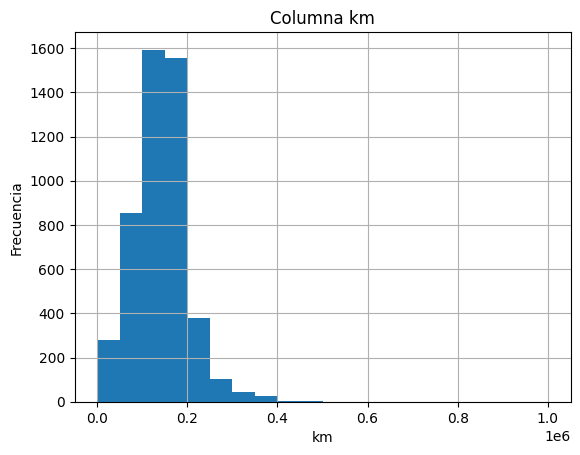

--------------------------------------------------


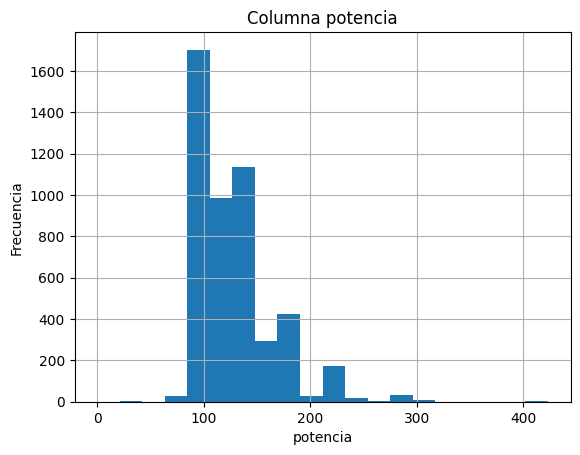

--------------------------------------------------


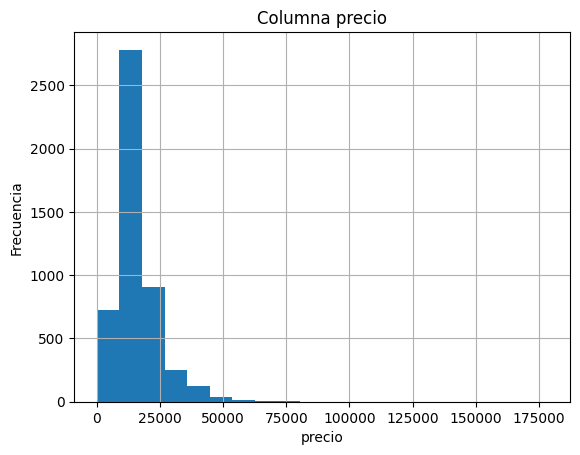

--------------------------------------------------


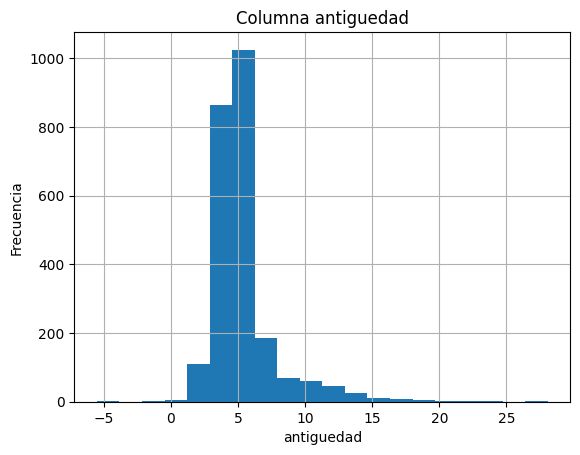

--------------------------------------------------


In [338]:
for i in ["km", "potencia", "precio", "antiguedad"]:
    plt.figure()  # Crea una nueva figura para cada histograma
    bmw3_coche[i].hist(bins=20)  # Crea el histograma de la columna
    plt.title(f"Columna {i}")  # Título para el gráfico
    plt.xlabel(i)  # Etiqueta para el eje X
    plt.ylabel("Frecuencia")  # Etiqueta para el eje Y
    plt.show()  # Muestra el histograma
    print("-" * 50)

In [339]:
#Hacemos un describe para ver las métricas de las variables numéricas:
bmw3_coche.describe()

,km,potencia,precio,fecha_venta,antiguedad
count,4.841000e+03,4842.000000,4837.000000,4842,2420.000000
mean,1.409593e+05,128.981826,15831.920612,2018-04-26 11:45:07.806691584,5.385633
min,-6.400000e+01,0.000000,100.000000,2007-08-01 00:00:00,-5.500342
25%,1.028840e+05,100.000000,10800.000000,2018-03-01 00:00:00,4.076660
50%,1.410800e+05,120.000000,14200.000000,2018-05-01 00:00:00,4.835044
75%,1.752170e+05,135.000000,18600.000000,2018-07-01 00:00:00,5.831622
max,1.000376e+06,423.000000,178500.000000,2018-09-01 00:00:00,28.084873
std,6.020853e+04,38.994839,9222.630708,NaN,2.526674


Tratamos los outliers y valores atípicos antes de tratar los nulos de las variables numéricas:

1. Kilometraje (km):
* El mínimo es -64 km, lo que parece un valor anómalo, posiblemente un error de registro.
* El máximo es 1,000,376 km, un valor inusualmente alto, lo que también podría indicar un error o un coche con una gran cantidad de uso. Optamos por darle credibilidad ya que es posible.

2. Potencia (potencia):
* El mínimo es 0 CV, lo que podría ser un error de registro.
* El máximo es 423 CV, lo que refleja coches de alta potencia.

3. Precio (precio):
* El mínimo es 100, lo que podría ser un precio erróneo, ya que es anormalmente bajo.
* El máximo es 178,500, lo que podría indicar un coche de alta gama.

4. Antigüedad (antiguedad):
* El mínimo es -5.5 años, lo que claramente es un error, ya que no tiene sentido que un coche tenga una antigüedad negativa.
* El máximo es 28.08 años, lo que indica que algunos coches pueden ser muy antiguos.











In [340]:
# Imputamos los valores negativos en las columnas 'km' y 'antiguedad' como nulos
bmw3_coche.loc[bmw3_coche['km'] < 0, 'km'] = np.nan
bmw3_coche.loc[bmw3_coche['antiguedad'] < 0, 'antiguedad'] = np.nan

In [341]:
# Imputamos los valores anormalmente bajos de la columna 'potencia' como nulos
bmw3_coche.loc[bmw3_coche['potencia'] < 60, 'potencia'] = np.nan

In [342]:
# Consultamos los registros con precios anormalmente bajos. Encontramos que hay varios registros, por lo que la posibilidad de que sean errores de registro se reducen.
# Quizás son precios de venta en desguaces, tras accidentes o muy antiguos.
bmw3_coche.loc[bmw3_coche['precio']<500].shape[0]

#Por lo que decidimos imputarlos como nulos.
bmw3_coche.loc[bmw3_coche['precio'] < 500, 'precio'] = np.nan

In [343]:
bmw3_coche.isnull().sum()

modelo                     0
km                         3
potencia                   4
tipo_gasolina              0
color                      0
tipo_coche                 0
volante_regulable          0
aire_acondicionado         0
camara_trasera             0
elevalunas_electrico       0
bluetooth                  0
gps                        0
alerta_lim_velocidad       0
precio                    21
fecha_venta                1
antiguedad              2425
dtype: int64

### Columna KM

La columna KM solo tiene 3 valores nulos.
Los imputaremos a la media.

In [344]:
bmw3_coche['km'].fillna(bmw3_coche['km'].mean(), inplace=True)

C:\Users\mixxt\AppData\Local\Temp\ipykernel_21760\1544529209.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bmw3_coche['km'].fillna(bmw3_coche['km'].mean(), inplace=True)


### Columna POTENCIA



La columna POTENCIA solo tiene 4 valores nulos. Los imputamos a la moda.

In [345]:
bmw3_coche["potencia"].value_counts(dropna=False)

potencia
135.0    882
120.0    785
85.0     631
100.0    570
105.0    451
190.0    319
140.0    166
160.0    152
110.0    142
230.0    120
155.0     99
180.0     62
225.0     49
130.0     47
150.0     43
90.0      40
280.0     32
122.0     30
173.0     25
210.0     21
137.0     19
125.0     16
170.0     14
70.0      11
145.0      9
75.0       9
235.0      7
142.0      6
87.0       6
127.0      5
220.0      5
112.0      5
240.0      5
309.0      4
317.0      4
NaN        4
119.0      4
80.0       4
107.0      3
200.0      3
195.0      3
77.0       3
95.0       3
270.0      2
233.0      2
101.0      2
141.0      2
189.0      2
192.0      2
183.0      2
66.0       2
250.0      1
236.0      1
239.0      1
121.0      1
224.0      1
412.0      1
423.0      1
300.0      1
261.0      1
Name: count, dtype: int64

In [346]:
bmw3_coche['potencia'].fillna(bmw3_coche['potencia'].mode()[0], inplace=True)

C:\Users\mixxt\AppData\Local\Temp\ipykernel_21760\48866934.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bmw3_coche['potencia'].fillna(bmw3_coche['potencia'].mode()[0], inplace=True)


### Columna PRECIO

La columna precio tiene 21 registros nulos. Al ser el target decidimos eliminarlas.

In [347]:
bmw3_coche.dropna(subset=['precio'], inplace=True)

### Columna ANTIGUEDAD

La columna ANTIGUEDAD tiene 2425 registros nulos. Para la imputación de los nulos de esta columna, haremos lo siguiente:

* Calcular la media de antigüedad por modelo e imputar dicha media a cada modelo correspondiente. Es decir, calcular la media de antigüedad para el modelo 118, e imputarsela a aquellos coches con antigüedad nula cuyo modelo sea el 118.

**Inconveniente**: Los valores únicos que toma la variable modelo hacen un total de 76, siendo muchos de estos poco representativos como para calcular una media de antigüedad para cada uno de los modelos.





In [348]:
print(len(bmw3_coche["modelo"].unique()))

76


Para solventar este problema, se nos ocurre reagrupar los modelos en categorías más generales basándonos en el tamaño o estilo del coche. Por ejemplo:

* Compacto:	'118', '116', '114', '120', '125', '123', '135', 'M135', 'i3'
* Sedán pequeño:	'316', '318', '320', '328', '330', '335', '320 Gran Turismo', '325 Gran Turismo', '330 Gran Turismo'
* Sedán mediano:	'520', '525', '528', '530', '535', '535 Gran Turismo', '520 Gran Turismo', '530 Gran Turismo'
* Sedán premium:	'640', '650', '740', '750', 'ActiveHybrid 5', '730', '735', 'M550', 'M5'
* Coupé/Deportivo:	'M4', 'M3', '430', '420', '418 Gran Coupé', '430 Gran Coupé', '435', '435 Gran Coupé', '640 Gran Coupé', 'Z4', 'i8'
* SUV/4x4:	'X1', 'X3', 'X4', 'X5', 'X6', 'X6 M', 'X5 M', 'X5 M50'
* Familiar/Van:	'216 Active Tourer', '216 Gran Tourer', '218 Active Tourer', '218 Gran Tourer', '220 Active Tourer', '225'
* Otros:	Modelos no clasificados explícitamente arriba.


In [349]:
# Diccionario para mapear modelos a grupos
mapa_modelos = {
    '118': 'Compacto', '116': 'Compacto', '114': 'Compacto', '120': 'Compacto', '125': 'Compacto',
    '123': 'Compacto', '135': 'Compacto', 'M135': 'Compacto', 'i3': 'Compacto',
    '316': 'Sedán pequeño', '318': 'Sedán pequeño', '320': 'Sedán pequeño', '328': 'Sedán pequeño',
    '330': 'Sedán pequeño', '335': 'Sedán pequeño', '320 Gran Turismo': 'Sedán pequeño',
    '325 Gran Turismo': 'Sedán pequeño', '330 Gran Turismo': 'Sedán pequeño',
    '520': 'Sedán mediano', '525': 'Sedán mediano', '528': 'Sedán mediano', '530': 'Sedán mediano',
    '535': 'Sedán mediano', '535 Gran Turismo': 'Sedán mediano', '520 Gran Turismo': 'Sedán mediano',
    '530 Gran Turismo': 'Sedán mediano',
    '640': 'Sedán premium', '650': 'Sedán premium', '740': 'Sedán premium', '750': 'Sedán premium',
    'ActiveHybrid 5': 'Sedán premium', '730': 'Sedán premium', '735': 'Sedán premium',
    'M550': 'Sedán premium', 'M5': 'Sedán premium',
    'M4': 'Coupé/Deportivo', 'M3': 'Coupé/Deportivo', '430': 'Coupé/Deportivo', '420': 'Coupé/Deportivo',
    '418 Gran Coupé': 'Coupé/Deportivo', '430 Gran Coupé': 'Coupé/Deportivo', '435': 'Coupé/Deportivo',
    '435 Gran Coupé': 'Coupé/Deportivo', '640 Gran Coupé': 'Coupé/Deportivo', 'Z4': 'Coupé/Deportivo',
    'i8': 'Coupé/Deportivo',
    'X1': 'SUV/4x4', 'X3': 'SUV/4x4', 'X4': 'SUV/4x4', 'X5': 'SUV/4x4', 'X6': 'SUV/4x4',
    'X6 M': 'SUV/4x4', 'X5 M': 'SUV/4x4', 'X5 M50': 'SUV/4x4',
    '216 Active Tourer': 'Familiar/Van', '216 Gran Tourer': 'Familiar/Van', '218 Active Tourer': 'Familiar/Van',
    '218 Gran Tourer': 'Familiar/Van', '220 Active Tourer': 'Familiar/Van', '225': 'Familiar/Van'
}

# Aplicar el mapeo y creamos la columna GRUPO_MODELO:
bmw3_coche['grupo_modelo'] = bmw3_coche['modelo'].map(mapa_modelos).fillna('Otros')


In [350]:
bmw3_coche.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,antiguedad,grupo_modelo
0,118,140411.0,100.0,diesel,black,sedan,True,True,False,True,True,True,True,11300.0,2018-01-01,5.916496,Compacto
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01,NaN,Coupé/Deportivo
2,320,183297.0,120.0,diesel,white,suv,False,False,False,True,False,True,False,10200.0,2018-02-01,5.837098,Sedán pequeño
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,False,25100.0,2018-02-01,NaN,Coupé/Deportivo
4,425,97097.0,160.0,diesel,silver,estate,True,True,False,False,True,True,True,33400.0,2018-04-01,NaN,Otros


In [351]:
bmw3_coche["grupo_modelo"].value_counts()

grupo_modelo
Sedán pequeño      1672
Sedán mediano      1062
SUV/4x4            1060
Compacto            569
Otros               248
Coupé/Deportivo     102
Sedán premium        78
Familiar/Van         31
Name: count, dtype: int64

Ahora que tenemos la nueva columna GRUPO_MODELO, podemos calcular la media de la antigüedad por grupo y luego imputarla a los modelos dentro de cada grupo.




In [352]:
#Usamos el método groupby para agrupar por grupo_modelo y calcular la media de antiguedad para cada grupo:

medias_antiguedad = bmw3_coche.groupby('grupo_modelo')['antiguedad'].mean()
print(medias_antiguedad)

grupo_modelo
Compacto           5.445430
Coupé/Deportivo    3.884668
Familiar/Van       2.846944
Otros              4.369170
SUV/4x4            5.272530
Sedán mediano      5.642235
Sedán pequeño      5.454661
Sedán premium      5.595346
Name: antiguedad, dtype: float64


In [353]:
#Imputamos la media calculada en medias_antiguedad a los valores nulos de antigüedad. Los guardamos en una nueva columna llamada ANTIGUEDAD_IMPUTADA que posteriormente desecharemos:
bmw3_coche['antiguedad_imputada'] = bmw3_coche['grupo_modelo'].map(medias_antiguedad)

In [354]:
# Reemplazamos los valores nulos de antigüedad con las medias imputadas
bmw3_coche['antiguedad'] = bmw3_coche['antiguedad'].fillna(bmw3_coche['antiguedad_imputada'])


In [355]:
#Eliminamos la columna ANTIGUEDAD_IMPUTADA
bmw3_coche = bmw3_coche.drop(columns=['antiguedad_imputada'])


In [356]:
bmw3_coche.isnull().any()

modelo                  False
km                      False
potencia                False
tipo_gasolina           False
color                   False
tipo_coche              False
volante_regulable       False
aire_acondicionado      False
camara_trasera          False
elevalunas_electrico    False
bluetooth               False
gps                     False
alerta_lim_velocidad    False
precio                  False
fecha_venta              True
antiguedad              False
grupo_modelo            False
dtype: bool

Ahora tenemos nuestro dataset limpio de nulos.

In [357]:
bmw_clean = bmw3_coche.copy()

In [358]:
bmw_clean

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,antiguedad,grupo_modelo
0,118,140411.0,100.0,diesel,black,sedan,True,True,False,True,True,True,True,11300.0,2018-01-01,5.916496,Compacto
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01,3.884668,Coupé/Deportivo
2,320,183297.0,120.0,diesel,white,suv,False,False,False,True,False,True,False,10200.0,2018-02-01,5.837098,Sedán pequeño
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,False,25100.0,2018-02-01,3.884668,Coupé/Deportivo
4,425,97097.0,160.0,diesel,silver,estate,True,True,False,False,True,True,True,33400.0,2018-04-01,4.369170,Otros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743.0,110.0,diesel,black,suv,False,True,False,False,False,True,False,14600.0,2018-08-01,2.846944,Familiar/Van
4839,218 Active Tourer,49832.0,100.0,diesel,grey,sedan,False,True,False,False,False,True,True,17500.0,2018-08-01,3.167693,Familiar/Van
4840,218 Gran Tourer,19633.0,110.0,diesel,grey,van,False,True,False,False,False,True,True,17000.0,2018-09-01,2.918549,Familiar/Van
4841,218 Active Tourer,27920.0,110.0,diesel,brown,van,True,True,False,False,False,True,True,22700.0,2018-09-01,2.417522,Familiar/Van


 # FEATURE ENGINEER 

En esta sección exploraremos nuevas variables que pueden aportar información relevante para mejorar nuestro modelo. Como se mostró al inicio del notebook, creamos la variable 'antigüedad' calculando la diferencia entre las columnas 'fecha_registro' y 'fecha_venta', que representan respectivamente la fecha de matriculación y la fecha de venta del vehículo.



### Columna Kilometro_por_año

In [359]:
# Kilometro_por_año
bmw_clean['km_por_año'] = bmw_clean['km'] / (bmw_clean['antiguedad'] + 1)

#Esta nueva variable, nos da una media de kilometros por año para cada coche.
#Sumamos 1 para evitar divisiones por cero en los casos donde la antigüedad sea 0 (vehículos muy nuevos). 
# Esta métrica nos ayuda a entender mejor el uso relativo del coche según su tiempo en circulación, lo cual puede ser 
# un factor relevante para predecir su precio.

In [360]:
bmw_clean['km_por_año'].describe()

count     4822.000000
mean     22482.619529
std       9055.653869
min         88.654301
25%      16355.411156
50%      22186.042495
75%      27973.767988
max      73988.545428
Name: km_por_año, dtype: float64

Haciendo un describe de la nueva variable, vemos que la media que recorre un bmw es de 22,483 km/año.
La desviación estándar indica que los kilómetros por año varían en promedio unos 9,056 km respecto a la media. Es decir, hay bastante dispersión.
min = 88.65
El valor mínimo registrado es muy bajo, apenas 89 km por año, puede ser un coche casi sin uso.

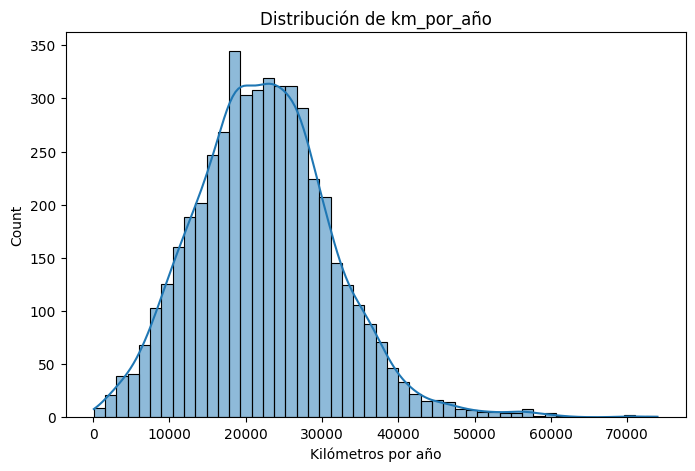

In [361]:
#Vamos ver como se distribuye esta variable 
plt.figure(figsize=(8,5))
sns.histplot(bmw_clean['km_por_año'], bins=50, kde=True)
plt.title('Distribución de km_por_año')
plt.xlabel('Kilómetros por año')
plt.show()



La variable km_por_año presenta una concentración alta de coches que recorren alrededor de 22,000 km anuales, lo que indica que la mayoría de los vehículos tienen un uso relativamente uniforme y moderado.
Sin embargo, se observan algunos valores extremos (outliers) que llegan hasta cerca de 70,000 km por año, probablemente correspondiendo a coches muy antiguos o con un uso intensivo, que podrían influir en el modelo.

### Columna Antigüedad_potencia

In [362]:
#Antigüedad/Potencia
bmw_clean['antiguedad_potencia'] = bmw_clean['antiguedad'] / (bmw_clean['potencia'] + 1)

#Esta variable explica la relacion entre antiguedad y potencia.
#Si coches más antiguos tienden a tener menor o mayor potencia, o si esa relación influye en el precio.

Text(0.5, 0, 'Antigüedad / (Potencia + 1)')

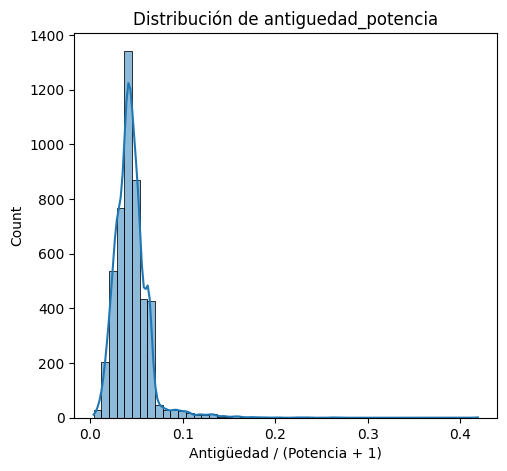

In [363]:
plt.figure(figsize=(12,5))

# Histograma con KDE
plt.subplot(1, 2, 1)
sns.histplot(bmw_clean['antiguedad_potencia'], bins=50, kde=True)
plt.title('Distribución de antiguedad_potencia')
plt.xlabel('Antigüedad / (Potencia + 1)')

In [364]:
bmw_clean['antiguedad_potencia'].describe()

count    4822.000000
mean        0.044399
std         0.019470
min         0.003773
25%         0.033056
50%         0.042018
75%         0.051459
max         0.419177
Name: antiguedad_potencia, dtype: float64

En esta nueva variable vemos que, la mayoría de los BMW tienen buena potencia, incluso los que no son muy nuevos. Solo unos pocos coches viejos y poco potentes destacan como outliers.
Ahora vamos a ver como influye esta nueva variable en el precio:

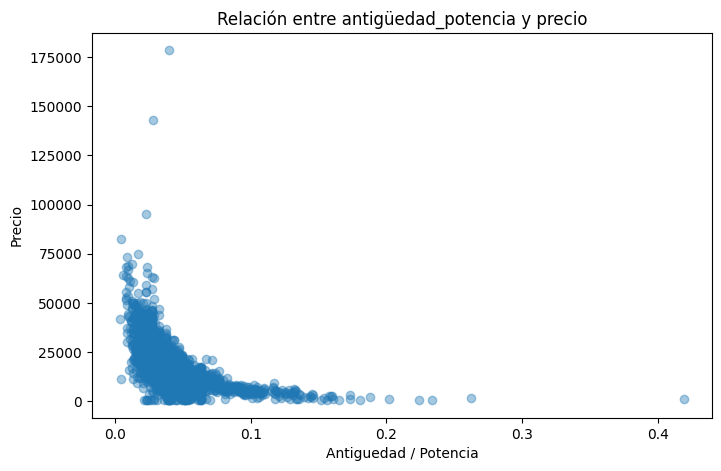

In [365]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(bmw_clean['antiguedad_potencia'], bmw_clean['precio'], alpha=0.4)
plt.xlabel('Antiguedad / Potencia')
plt.ylabel('Precio')
plt.title('Relación entre antigüedad_potencia y precio')
plt.show()



- La mayoría de los coches se concentran en valores bajos (0 a 0.1).
- Los precios más altos (coches de lujo) solo aparecen con valores bajos de antigüedad_potencia (coches más nuevos o potentes).
- A medida que aumenta la relación antigüedad/potencia, los precios caen y casi no hay coches caros.
- Conclusión: `antiguedad_potencia` podría ser una variable útil, especialmente para diferenciar coches de lujo/nuevos frente a los baratos.


# Columna Fecha_venta 

In [366]:
#Borramos el nulo que teniamos en esta columna 
bmw_clean = bmw_clean.dropna(subset=['fecha_venta'])
bmw_clean['fecha_venta'].isnull().sum()

np.int64(0)

In [367]:
#Ahora exploramos esta variable y ver algunos insights que tiene 
bmw_clean['fecha_venta'].dt.year.unique()

array([2018, 2007, 2010, 2009, 2008], dtype=int32)

In [368]:
ventas_por_año = bmw_clean['fecha_venta'].dt.year.value_counts()
print(ventas_por_año)


fecha_venta
2018    4817
2007       1
2010       1
2009       1
2008       1
Name: count, dtype: int64


Vemos que 2018 es el año con más ventas registradas y que no existe una secuencia continua entre los años, ya que hay un salto desde 2010 directamente a 2018. Por motivos desconocidos, en los años anteriores solo se ha registrado una venta por año, lo cual resulta muy atípico. 

Por este motivo, decidimos filtrar el DF y conservar únicamente las ventas correspondientes al año 2018. Esto nos permite evitar introducir ruido o sesgo en nuestro modelo, asegurando que el análisis se base en datos representativos y consistentes.


In [369]:
años_validos = ventas_por_año[ventas_por_año > 1].index


In [370]:
bmw_clean = bmw_clean[bmw_clean['fecha_venta'].dt.year.isin(años_validos)]


Mes_venta

In [371]:
#Mes_venta
bmw_clean['mes_venta'] = bmw_clean['fecha_venta'].dt.month

#Esta variable nos ayuda a ver si hay estacionalidad (si hay meses en los que se vende mas ).Muy util para detectar patrones
#Como solo tenemos un año '2018' vamos a borrar la variable 'fecha_venta' y a trabajar solo con ' mes'

In [372]:
bmw_clean['mes_venta']= bmw_clean['fecha_venta'].dt.month
bmw_clean.drop(columns=['fecha_venta'], inplace=True)

In [373]:
for mes in range(1, 13):
    cantidad = (bmw_clean['mes_venta'] == mes).sum()
    print(f"Mes {mes}: {cantidad} registros")


Mes 1: 208 registros
Mes 2: 500 registros
Mes 3: 731 registros
Mes 4: 689 registros
Mes 5: 806 registros
Mes 6: 603 registros
Mes 7: 534 registros
Mes 8: 523 registros
Mes 9: 223 registros
Mes 10: 0 registros
Mes 11: 0 registros
Mes 12: 0 registros


In [374]:
#Vemos que para los tres ultimos meses del año no se han encontrado registros de ventas. Lo cual puede deberse a varios factores que desconocemos.
#El mes que mas se ha vendido es el Mes 5 

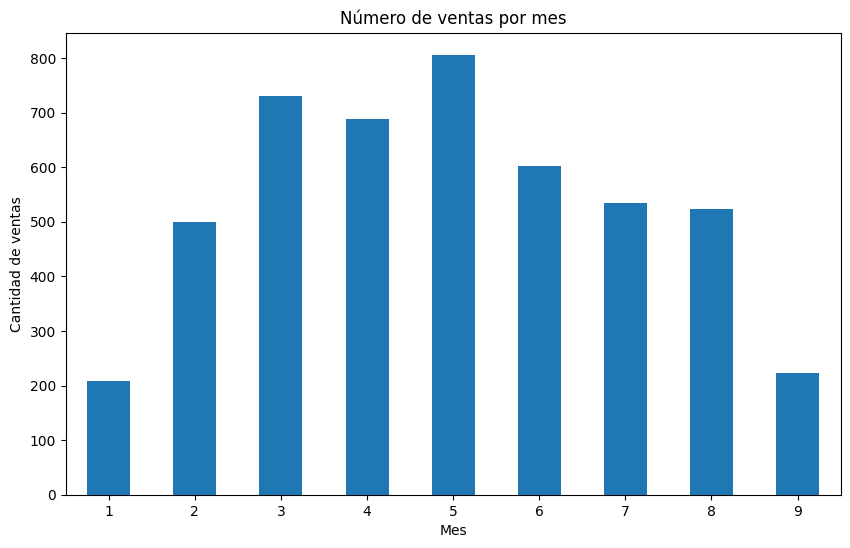

In [375]:
ventas_por_mes = bmw_clean['mes_venta'].value_counts().sort_index()

ventas_por_mes.plot(kind='bar', figsize=(10,6))
plt.title('Número de ventas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=0)
plt.show()




In [376]:
print(bmw_clean['mes_venta'].value_counts().sort_index())

#Aqui vemos que el mes que mas se ha vendido es el mes 5
#Vamos a ver que tipo de modelo se vendio mas 


mes_venta
1    208
2    500
3    731
4    689
5    806
6    603
7    534
8    523
9    223
Name: count, dtype: int64


In [377]:
bmw_clean[['grupo_modelo', 'modelo']].value_counts().idxmax()

('Sedán pequeño', '320')

Dado que nuestros datos solo corresponden al año 2018, la columna fecha_venta no aporta información relevante.
Por ello, decidimos conservar únicamente el mes de venta (mes_venta) y eliminar la columna fecha_venta.


## 3. Análisis univariable, explicar alguna información interesante encontrada


### Columnas TIPO_COCHE y GRUPO_MODELO

El hecho de que las columnas tipo_coche y grupo_modelo sean similares sugiere que grupo_modelo ya captura de manera efectiva la información que tipo_coche proporciona, pero de una forma más condensada. Dado que hemos basado la creación de la columna grupo_modelo en la columna modelo, y que probablemente grupo_modelo agrupe la información de forma más relevante para el modelo predictivo del precio, eliminar tipo_coche podría ser una opción válida.

No obstante, optamos por analizar previamente cómo se comportan ambas columnas en relación con el precio, para ver si una contribuye más que la otra a la predicción del precio. Para hacer esto, hacemos un análisis de correlación y vemos si ambas columnas tienen un impacto significativo sobre el precio.

In [378]:
# Agrupar por tipo_coche y calcular la media del precio
print(bmw_clean.groupby('tipo_coche')['precio'].mean())
print("-"*50)
print(bmw_clean.groupby('grupo_modelo')['precio'].mean())

tipo_coche
convertible    16560.526316
coupe          20100.877193
estate         13750.783699
hatchback      14237.481910
sedan          15896.193772
subcompact     11166.037736
suv            20119.888476
van            15297.560976
Name: precio, dtype: float64
--------------------------------------------------
grupo_modelo
Compacto           10145.694200
Coupé/Deportivo    29085.294118
Familiar/Van       15383.870968
Otros              17116.935484
SUV/4x4            21485.943396
Sedán mediano      16936.380773
Sedán pequeño      11993.705036
Sedán premium      29687.179487
Name: precio, dtype: float64


En vista de los resultados obtenidos, consideramos que GRUPO_MODELO es una categoría más específica y que tiene un poder predictivo más fuerte (como parece ser por las medias de precio más diferenciadas).

De igual forma, la columna MODELO ha sido utilizada para crear la columna GRUPO_MODELO. Esto se hizo así debido a su alta cardinalidad y a la complejidad de lidiar con una columna con tantos valores únicos.

Consideramos que las categorías de la columna GRUPO_MODELO ya capturan la información sobre el tipo de coche y su segmentación de mercado, lo que hace que GRUPO_MODELO sea potencialmente una característica más útil para predecir el precio que TIPO_COCHE y MODELO.

Optamos por  eliminar la columna TIPO_COCHE y la columna MODELO:

In [379]:
#Hacemos una copia del dataset:
bmw_clean2 = bmw_clean.copy()

In [380]:
bmw_clean2 = bmw_clean.drop(columns=['tipo_coche','modelo'])

In [381]:
bmw_clean2

,km,potencia,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad,grupo_modelo,km_por_año,antiguedad_potencia,mes_venta
0,140411.0,100.0,diesel,black,True,True,False,True,True,True,True,11300.0,5.916496,Compacto,20300.887778,0.058579,1
1,13929.0,317.0,petrol,grey,True,True,False,False,True,True,True,69700.0,3.884668,Coupé/Deportivo,2851.575562,0.012216,2
2,183297.0,120.0,diesel,white,False,False,False,True,False,True,False,10200.0,5.837098,Sedán pequeño,26809.181800,0.048240,2
3,128035.0,135.0,diesel,red,True,True,False,True,True,True,False,25100.0,3.884668,Coupé/Deportivo,26211.607230,0.028564,2
4,97097.0,160.0,diesel,silver,True,True,False,False,True,True,True,33400.0,4.369170,Otros,18084.173683,0.027138,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,39743.0,110.0,diesel,black,False,True,False,False,False,True,False,14600.0,2.846944,Familiar/Van,10331.058633,0.025648,8
4839,49832.0,100.0,diesel,grey,False,True,False,False,False,True,True,17500.0,3.167693,Familiar/Van,11956.733782,0.031363,8
4840,19633.0,110.0,diesel,grey,False,True,False,False,False,True,True,17000.0,2.918549,Familiar/Van,5010.273013,0.026293,9
4841,27920.0,110.0,diesel,brown,True,True,False,False,False,True,True,22700.0,2.417522,Familiar/Van,8169.661526,0.021779,9


### Distribución del precio

¿CÓMO SE DISTRIBUYEN LOS PRECIOS DE LOS COCHES EN EL DATASET?

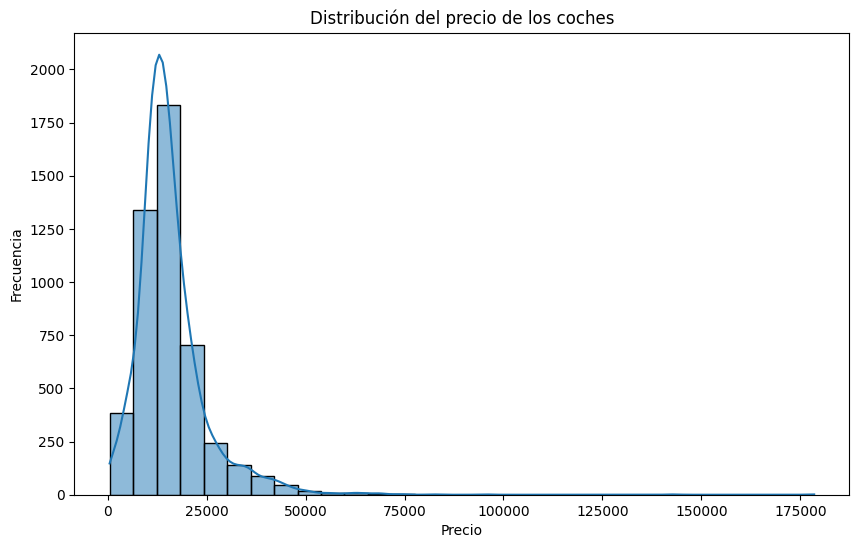

In [382]:
plt.figure(figsize=(10, 6))
sns.histplot(bmw_clean2['precio'], kde=True, bins=30)
plt.title('Distribución del precio de los coches')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

- Asimetría positiva (sesgo a la derecha): La mayoría de los coches tienen precios concentrados en un rango bajo (entre 10,000 y 30,000), mientras que hay valores más altos, aunque menos frecuentes, que se extienden hasta aproximadamente 175,000.

- Presencia de valores extremos: Aunque la mayoría de los precios están dentro de un rango razonable, los valores más altos representan coches de lujo o con características muy específicas, y podrían considerarse outliers.

- Modas visibles: Hay un pico claro en la distribución cerca del promedio, lo que sugiere que hay rangos de precios populares o accesibles.

### Distribución de la antigüedad

¿Qué tan antiguos son los coches en el dataset?

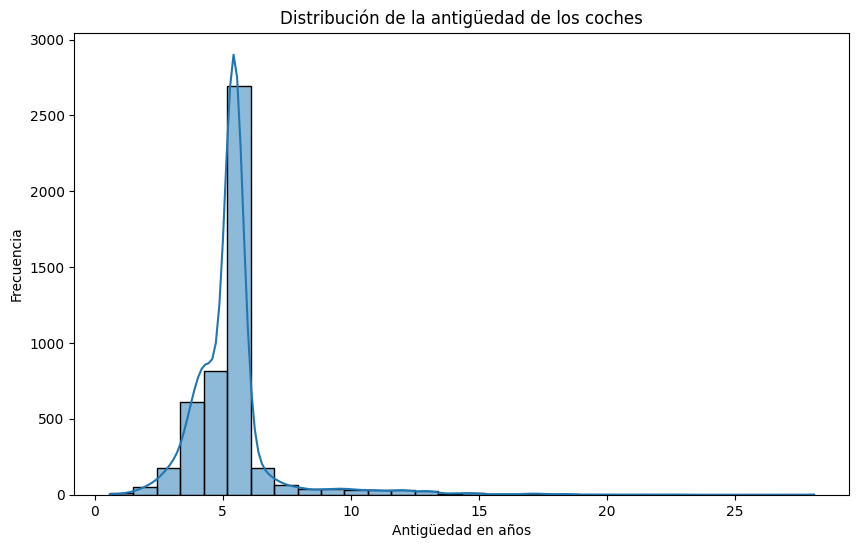

In [383]:
plt.figure(figsize=(10, 6))
sns.histplot(bmw_clean2['antiguedad'], kde=True, bins=30)
plt.title('Distribución de la antigüedad de los coches')
plt.xlabel('Antigüedad en años')
plt.ylabel('Frecuencia')
plt.show()

- Concentración de datos: La mayoría de los coches tienen entre 4 y 6 años de antigüedad. Esto sugiere que el mercado analizado está dominado por vehículos relativamente recientes.
Hay pocos coches con más de 10 años de antigüedad.
- Asimetría: La distribución es asimétrica positiva (sesgada hacia la derecha). Esto indica que existen pocos coches muy antiguos en comparación con la mayoría que son más nuevos.
- Outliers potenciales: Aunque no son muy prominentes, algunos coches con más de 15 años de antigüedad podrían considerarse outliers en este contexto, dependiendo de su proporción en el dataset.
- Conclusiones prácticas: El modelo predictivo del precio debe tomar en cuenta esta concentración en coches de menor antigüedad. Es probable que la antigüedad sea una variable significativa en la predicción del precio, especialmente porque los coches más nuevos suelen tener precios más altos.

### Distribución del kilometraje

¿Cuál es la tendencia en el kilometraje de los coches?

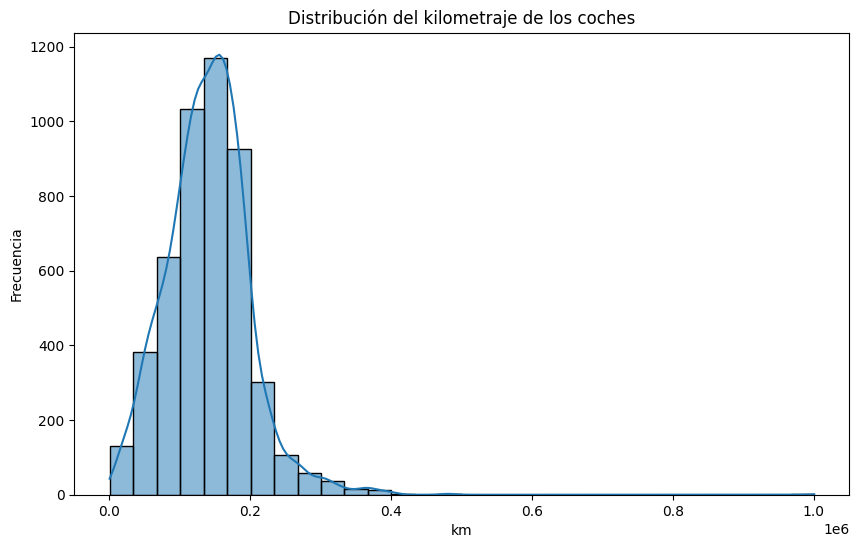

In [384]:
plt.figure(figsize=(10, 6))
sns.histplot(bmw_clean2['km'], kde=True, bins=30)
plt.title('Distribución del kilometraje de los coches')
plt.xlabel('km')
plt.ylabel('Frecuencia')
plt.show()

- El kilometraje está principalmente entre los 0 y 200,000 km, con una caída significativa después de este punto.
- Esto podría indicar que los coches con más de 200,000 km tienden a retirarse del mercado, posiblemente porque pierden atractivo para los compradores.

**Insights interesantes**:
- Relación entre precio y kilometraje:
    - Observando la distribución del kilometraje, la mayoría de los coches están por debajo de 200,000 km, lo que suele estar relacionado con coches en mejor estado o con menor uso.
    - En la distribución del precio, se observa que los valores altos son menos frecuentes, lo que puede implicar que los coches con precios elevados (posiblemente más nuevos o con menor desgaste) son una fracción pequeña del mercado. Esto sugiere una correlación inversamente proporcional esperada entre precio y kilometraje.

- Foco en coches recientes: En el gráfico de antigüedad, la concentración está entre 3 y 7 años, con muy pocos coches que superen los 15 años. Esto muestra una tendencia del mercado hacia coches más recientes. BMW es una marca premium que atrae a compradores interesados en coches modernos, lo que podría explicar esta concentración.

- Segmentación del mercado: La distribución del precio muestra que la mayoría de los coches se encuentra en rangos moderados (10,000-30,000 euros), pero también hay una cola hacia precios altos, lo que refleja un segmento más exclusivo. Combinando esto con el kilometraje y antigüedad, parece que los coches más caros suelen estar en mejores condiciones (menos antigüedad y kilometraje).

### Distribución de la potencia

¿Cuál es la tendencia en la potencia de los coches?

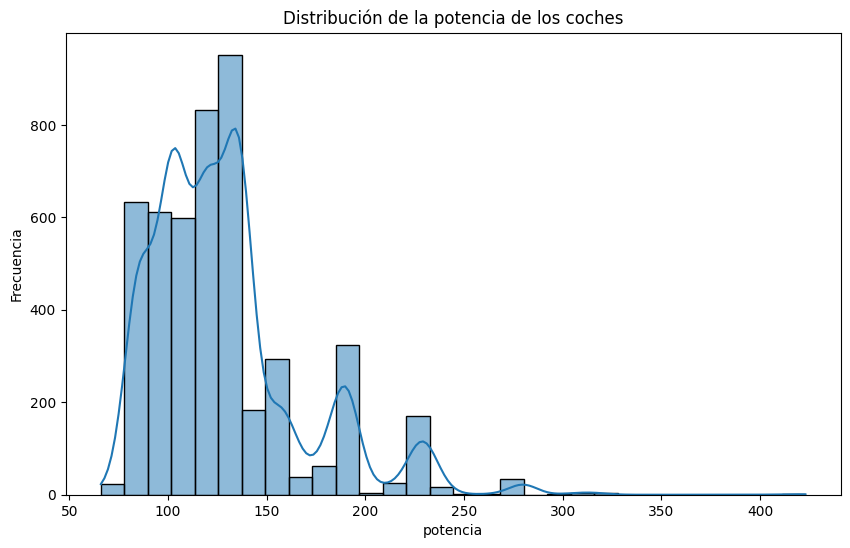

In [385]:
plt.figure(figsize=(10, 6))
sns.histplot(bmw_clean2['potencia'], kde=True, bins=30)
plt.title('Distribución de la potencia de los coches')
plt.xlabel('potencia')
plt.ylabel('Frecuencia')
plt.show()

- Distribución sesgada: La gráfica sugiere que la mayoría de los coches tienen una potencia entre 100 y 150 caballos (pico más alto en la distribución). A medida que aumenta la potencia, el número de coches disminuye progresivamente. Este es un patrón típico, ya que los vehículos de mayor potencia suelen ser más costosos y menos comunes.

- Densidad alta en el rango medio: La mayoría de los coches parecen estar diseñados para ofrecer un equilibrio entre potencia y consumo, representado en el rango de 100 a 200 caballos.

- Posibles coches premium: Los coches con potencias superiores a 300 caballos son poco frecuentes. Estos representan probablemente vehículos de alta gama, deportivos o de lujo.

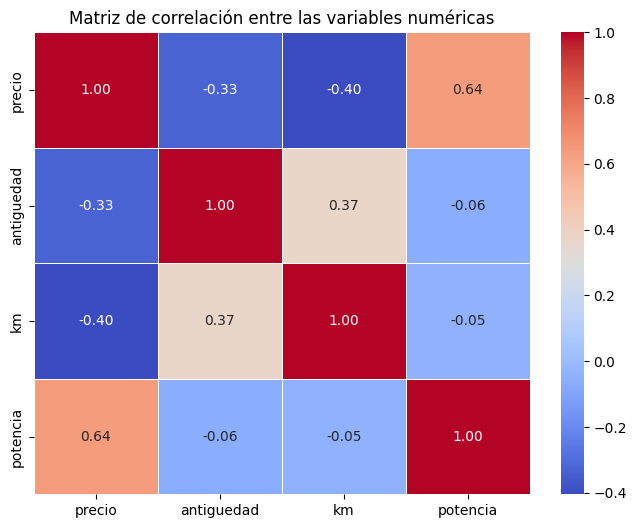

In [386]:
# Calcular la matriz de correlación
correlation_matrix = bmw_clean2[['precio', 'antiguedad', 'km','potencia']].corr()

# Visualizamos la matriz de correlación con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre las variables numéricas")
plt.show()

El precio de los coches está influenciado tanto por su kilometraje como por su antigüedad, con correlaciones negativas moderadas (-0.40 y -0.33 respectivamente). Esto respalda que los vehículos más usados y antiguos tienden a ser más económicos debido al desgaste y la depreciación.

También destaca la relación moderadamente fuerte entre potencia y precio (0.64). Esto indica que usualmente los coches de mayor potencia tienen un mayor precio.

Por otro lado, la relación positiva entre antigüedad y kilometraje (0.37) muestra que los coches más viejos suelen recorrer más distancia a lo largo de su vida útil.

### Distribución de grupo_modelo



¿Qué tipos de coches predominan en el dataset?

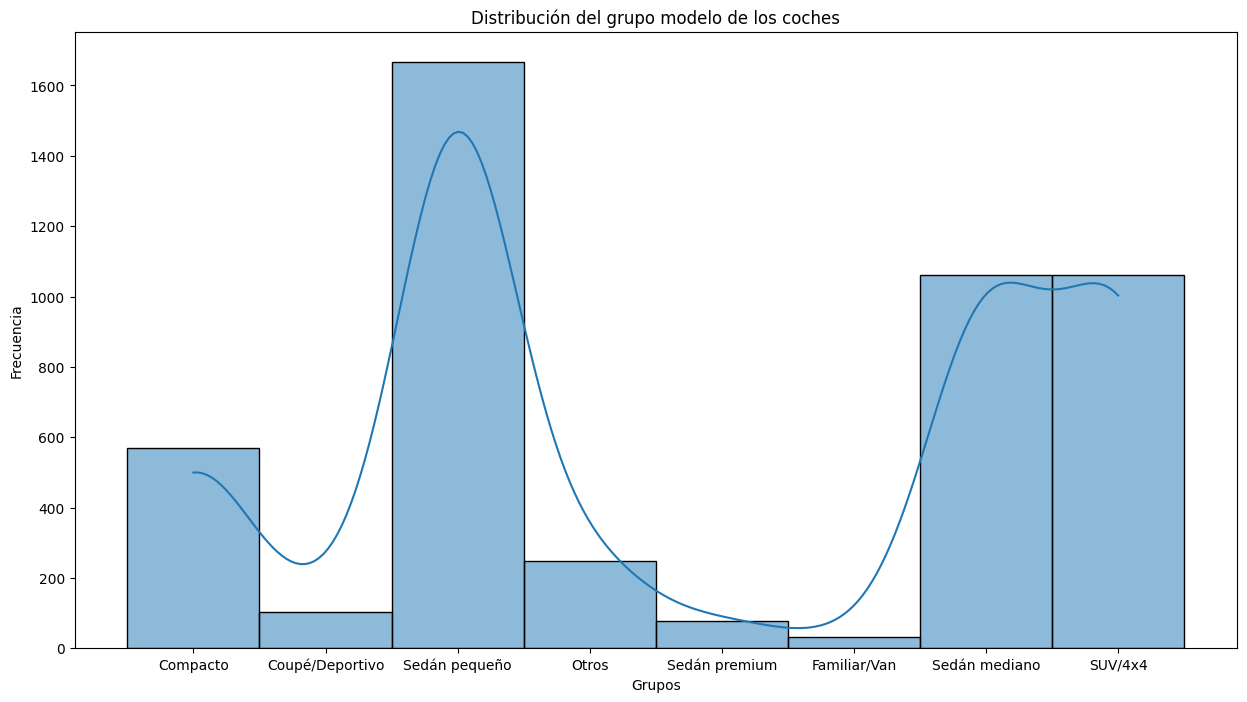

In [387]:
plt.figure(figsize=(15, 8))
sns.histplot(bmw_clean2['grupo_modelo'], kde=True, bins=30)
plt.title('Distribución del grupo modelo de los coches')
plt.xlabel('Grupos')
plt.ylabel('Frecuencia')
plt.show()

- Sedán pequeño y SUV/4x4 son los tipos de coche más comunes en el conjunto de datos, con una frecuencia significativamente alta en comparación con otros grupos. Esto indica que estas categorías son muy populares o abundantes en la muestra.

- Otros grupos, como Coupé/Deportivo, tienen una frecuencia mucho menor, lo que podría implicar que son menos comunes o que representan un nicho más específico.



### Relación entre combustible (tipo_gasolina) y precio

In [388]:
bmw_clean2["tipo_gasolina"].value_counts()

tipo_gasolina
diesel           4613
petrol            188
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64

Tenemos que agrupar las categorías de "Diesel" y "diesel".

In [389]:
# Agrupamos 'Diesel' con 'diesel' en la columna 'tipo_gasolina'
bmw_clean2['tipo_gasolina'] = bmw_clean2['tipo_gasolina'].replace('Diesel', 'diesel')

¿Cómo afecta el tipo de combustible al precio?

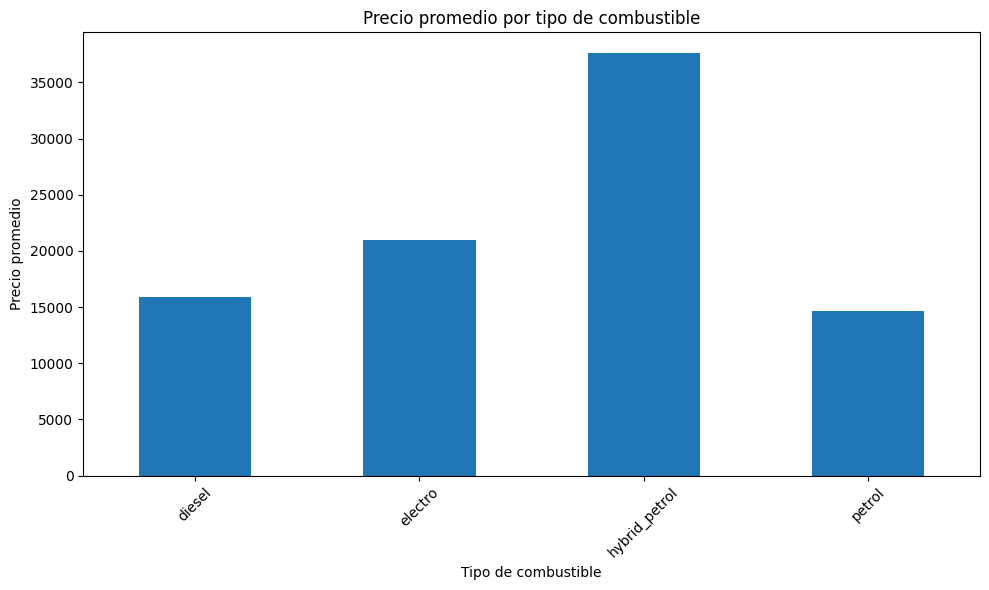

In [390]:
# Agrupar por tipo de combustible y calcular el precio promedio
precio_promedio_por_combustible = bmw_clean2.groupby('tipo_gasolina')['precio'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
precio_promedio_por_combustible.plot(kind='bar')
plt.title('Precio promedio por tipo de combustible')
plt.xlabel('Tipo de combustible')
plt.ylabel('Precio promedio')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout() # Ajustar el diseño para evitar que las etiquetas se superpongan
plt.show()

Los coches a gasolina o de diesel son más baratos que los eléctricos o híbridos, lo que puede reflejar las preferencias del mercado o los costos de tecnología.

### Relación entre potencia y grupo_modelo

C:\Users\mixxt\AppData\Local\Temp\ipykernel_21760\3336782452.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=bmw_clean2, x='grupo_modelo', y='potencia', palette='muted')


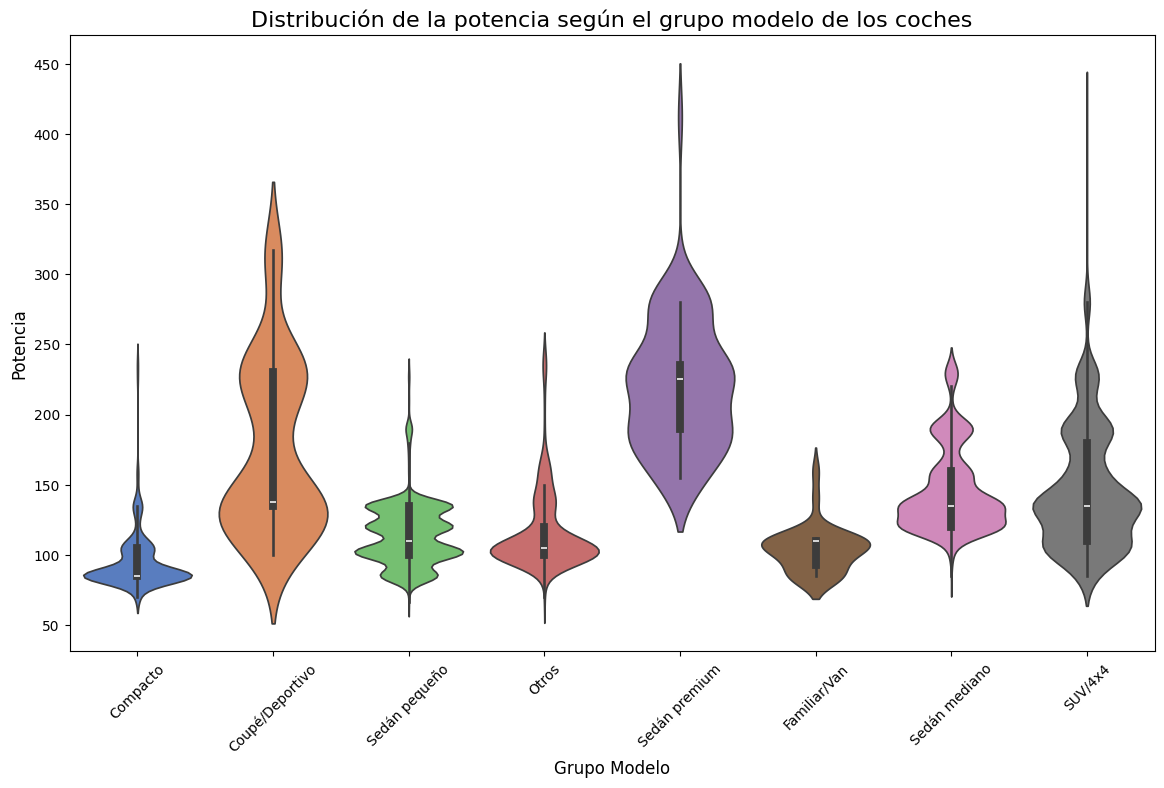

In [391]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Crear un gráfico de violín
sns.violinplot(data=bmw_clean2, x='grupo_modelo', y='potencia', palette='muted')

# Añadir títulos y etiquetas
plt.title('Distribución de la potencia según el grupo modelo de los coches', fontsize=16)
plt.xlabel('Grupo Modelo', fontsize=12)
plt.ylabel('Potencia', fontsize=12)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


Los grupos que tienen potencias más altas son:
- Coupé/Deportivo
- Sedán premium

Los grupos que tienen potencias más bajas son:
- Compacto (en su mayoría)
- Sedán pequeño
- Otros
- Familiar/Van

El resto de grupos tienen una distribución más repartida, abarcando potencias altas y bajas:
- Sedán mediano
- SUV/4x4



## 4. Análisis de correlación inicial


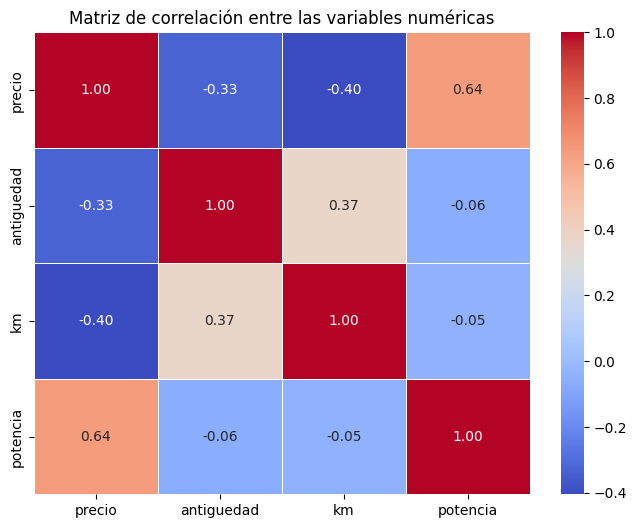

In [392]:
# Calcular la matriz de correlación
correlation_matrix = bmw_clean2[['precio', 'antiguedad', 'km','potencia']].corr()

# Visualizamos la matriz de correlación con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre las variables numéricas")
plt.show()

Correlaciones más relevantes:

- Precio y kilometraje: Correlación de -0.40 (moderadamente negativa).
Esto indica que, en general, los coches con mayor kilometraje tienden a tener un precio más bajo.
- Precio y antigüedad: Correlación de -0.33 (moderadamente negativa).
A medida que aumenta la antigüedad del coche, el precio disminuye.
- Antigüedad y kilometraje: Correlación de 0.37 (moderadamente positiva). Es más probable que cuanto más antiguo sea un coche, más uso se le ha podido dar, y viceversa.
- Precio y potencia: Correlación de 0.64. Destaca la relación moderadamente fuerte.
 - Relación directa: La correlación positiva significa que los coches con mayor potencia suelen ser más caros que aquellos con menos potencia.
  - Causa-efecto probable: Esta relación podría explicarse porque los coches con más potencia, como los deportivos o de alto rendimiento, generalmente se asocian con un precio más elevado debido a las características técnicas superiores y la demanda del mercado.
  - Análisis de mercado: Puede indicar que la potencia es un buen predictor del precio dentro de ciertos tipos de coches

Aunque estas correlaciones sean moderadas, ninguna de ellas indica una relación extremadamente fuerte (valores cercanos a 1 o -1). Esto sugiere que el precio de un coche es un valor que se calcula teniendo en cuenta múltiples factores:
- Modelo
- Kilometraje
- Antigüedad
- Extras incorporados
- Potencia


Posteriormente, cuando transformemos las variables categóricas a numéricas, volveremos a realizar este análisis y observaremos la totalidad de correlaciones.

## 5. Análisis variable vs target, ¿Hay algún insight interesante?




1. Precio vs. Kilometraje (km): Correlación de -0.40 (moderadamente negativa).
  - La correlación negativa entre el precio y el kilometraje puede indicar que los coches con mayor kilometraje suelen tener un precio más bajo. Esto tiene sentido, ya que los coches con más kilometraje tienden a ser más antiguos o haber tenido más uso, lo que reduce su valor.

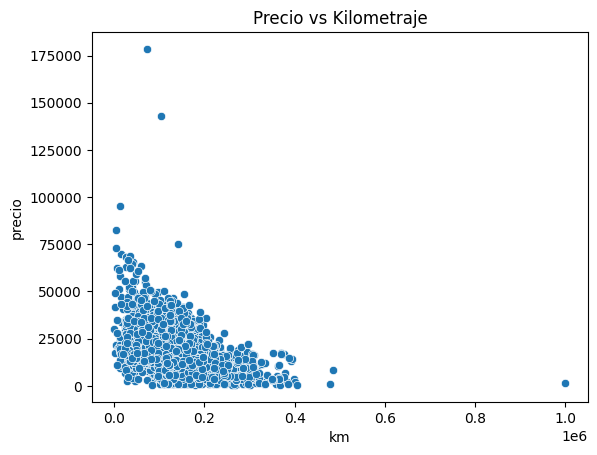

In [393]:
# precio vs km
sns.scatterplot(x='km', y='precio', data=bmw_clean2)
plt.title('Precio vs Kilometraje')
plt.show()


2. Precio vs. Antigüedad: Correlación de -0.33 (moderadamente negativa).
  - Si la correlación entre precio y antigüedad es negativa (lo cual es común), significa que los coches más antiguos generalmente tienen precios más bajos. Esto es consistente con la percepción del mercado: los coches nuevos o recientes suelen tener más valor debido a su menor desgaste y mayor demanda.

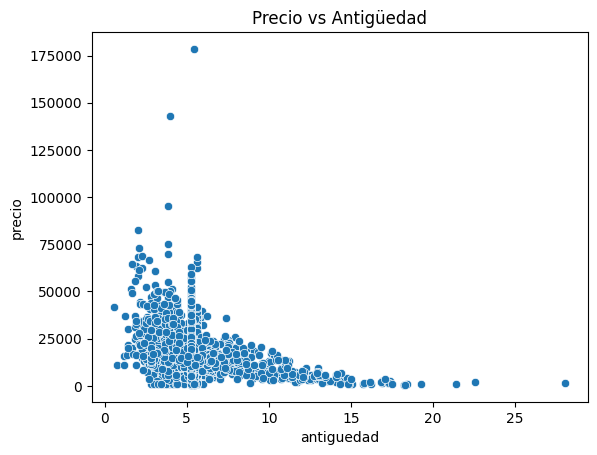

In [394]:
# precio vs antigüedad
sns.scatterplot(x='antiguedad', y='precio', data=bmw_clean2)
plt.title('Precio vs Antigüedad')
plt.show()


3. Precio vs. Potencia: correlación de 0.64 (moderadamente fuerte positiva).
  - Como ya se mencionó, una correlación positiva entre precio y potencia de 0.64 indica que los coches con mayor potencia tienden a ser más caros. Esto podría ser un indicativo de que los coches deportivos o de alta gama, que a menudo tienen una mayor potencia, tienen precios más elevados. Es probable que los consumidores valoren la potencia como una característica importante, especialmente en el segmento de vehículos de lujo o alto rendimiento.

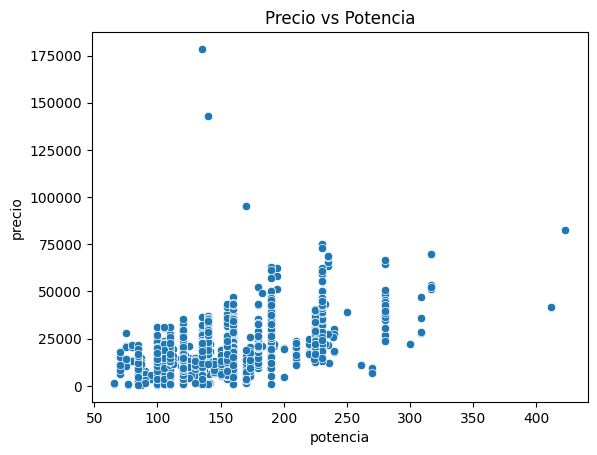

In [395]:
# Ejemplo para precio vs potencia
sns.scatterplot(x='potencia', y='precio', data=bmw_clean2)
plt.title('Precio vs Potencia')
plt.show()


4. Precio vs. grupo_modelo:
  - Al analizar la relación entre el precio y grupo_modelo, notamos que ciertos tipos de coches, como los Coupé/Deportivo o Sedanes premium, tienden a tener un precio más alto. Esto puede reflejar la demanda del mercado.
  - Por otro lado, modelos como los compactos tienen precios más bajos, lo cual es consistente con su orientación a un público más masivo y funcional.

C:\Users\mixxt\AppData\Local\Temp\ipykernel_21760\549370632.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=bmw_clean2, x='grupo_modelo', y='precio', palette='muted')


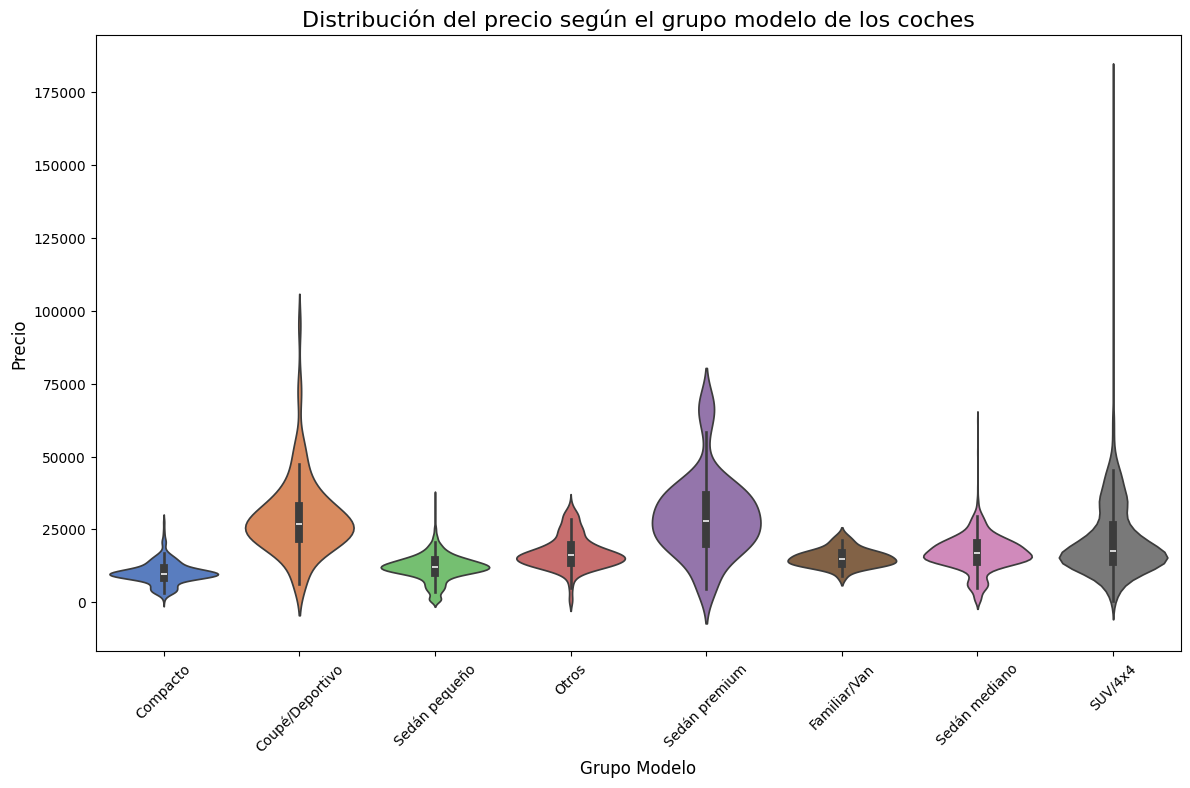

In [396]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Crear un gráfico de violín
sns.violinplot(data=bmw_clean2, x='grupo_modelo', y='precio', palette='muted')

# Añadir títulos y etiquetas
plt.title('Distribución del precio según el grupo modelo de los coches', fontsize=16)
plt.xlabel('Grupo Modelo', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


5. Precio vs tipo_gasolina:

Diesel:

- Gran dispersión de precios.
- Una notable concentración de datos en la parte baja (vehículos de precio más bajo).
- Existen valores atípicos que llegan a precios altos.

Petrol (gasolina):

- Una distribución más compacta que diesel.
- Los precios tienden a concentrarse en un rango medio-bajo.

Hybrid Petrol (híbrido):

- Gran dispersión con precios que tienden a ser más altos.
- Concentración clara de precios medios.

Electro (eléctrico):

- Distribución pequeña debido probablemente a un menor número de datos.
- Precios menos variables comparados con otras categorías.


C:\Users\mixxt\AppData\Local\Temp\ipykernel_21760\4080486471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bmw_clean2, x='tipo_gasolina', y='precio', palette='muted')


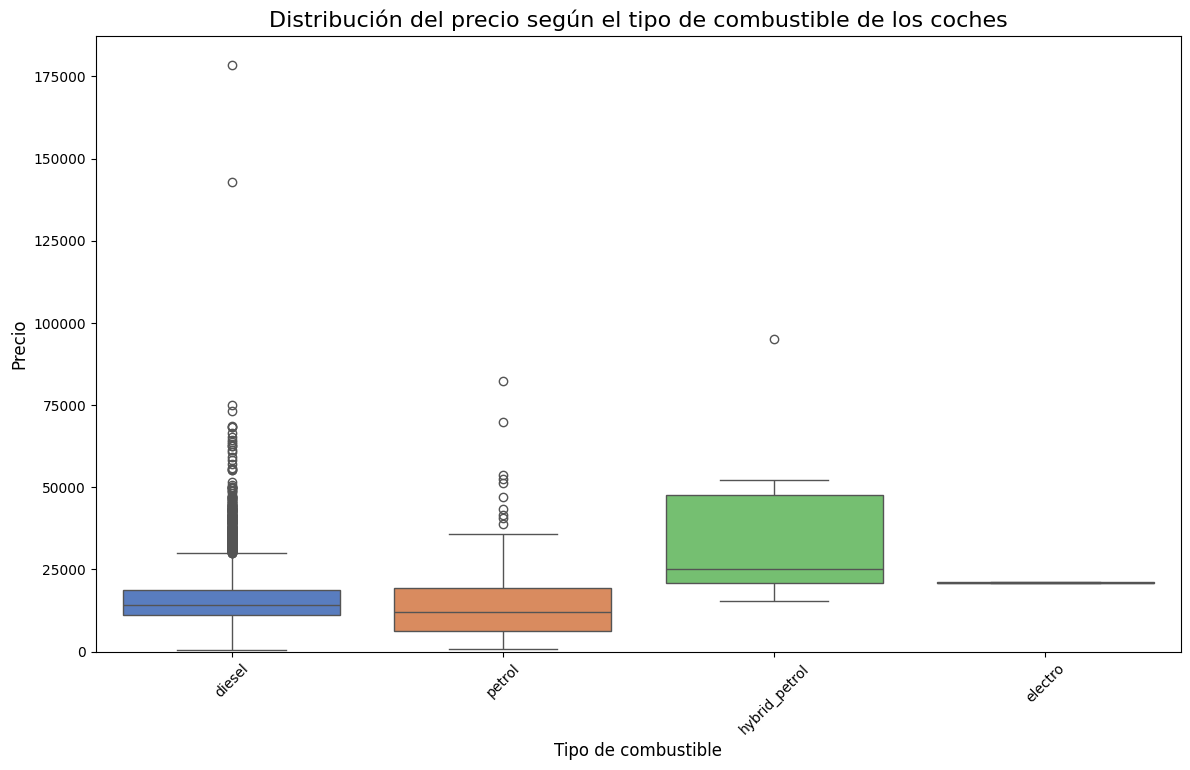

In [397]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Crear un gráfico de caja
sns.boxplot(data=bmw_clean2, x='tipo_gasolina', y='precio', palette='muted')

# Ajustar límites del eje Y
plt.ylim(0, None)  # Asegura que el eje Y empiece en 0

# Añadir títulos y etiquetas
plt.title('Distribución del precio según el tipo de combustible de los coches', fontsize=16)
plt.xlabel('Tipo de combustible', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


C:\Users\mixxt\AppData\Local\Temp\ipykernel_21760\2772036708.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=bmw_clean2, x='tipo_gasolina', y='precio', palette='muted')


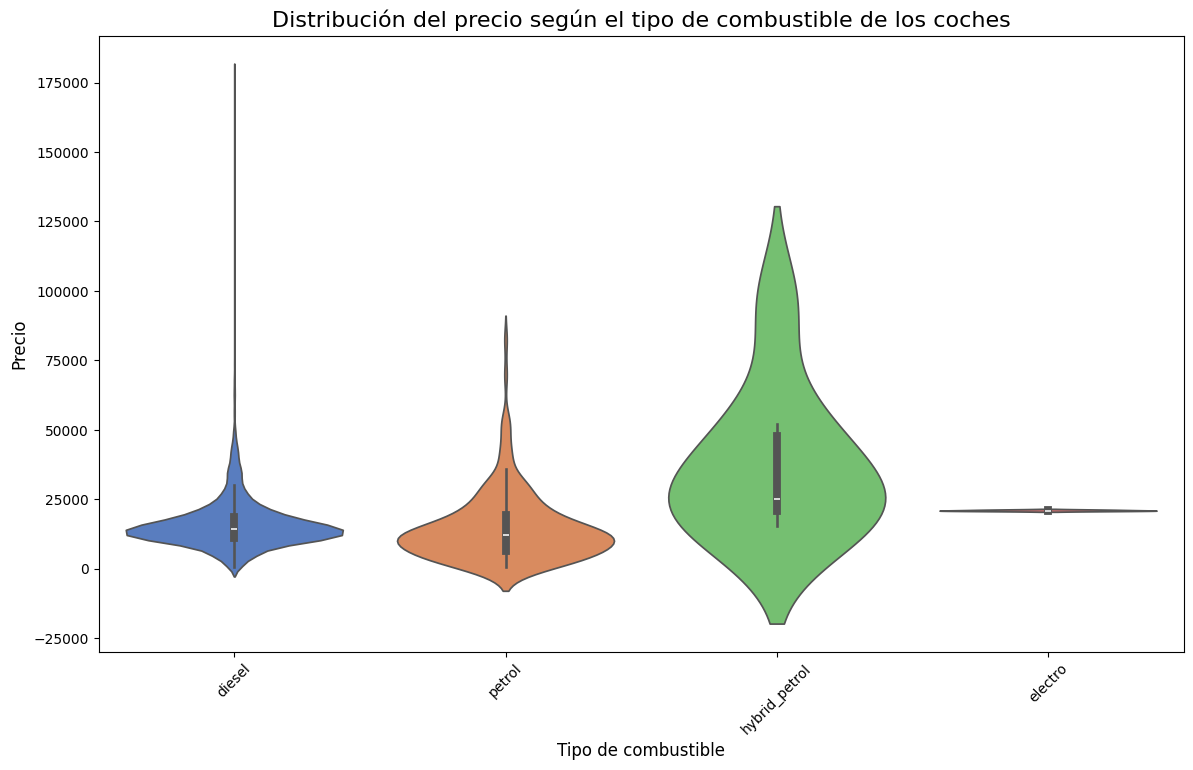

In [398]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Crear un gráfico de violín
sns.violinplot(data=bmw_clean2, x='tipo_gasolina', y='precio', palette='muted')

# Añadir títulos y etiquetas
plt.title('Distribución del precio según el tipo de combustible de los coches', fontsize=16)
plt.xlabel('Tipo de combustible', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


Consultando en internet, los valores negativos visibles en el gráfico de violín probablemente sean generados por cómo Seaborn está configurando los ejes. Esto ocurre en ocasiones porque Seaborn extiende el rango del eje para acomodar la visualización (especialmente en gráficos de violín o boxplots).

In [399]:
bmw_clean2.describe()
# Al hacer un describe, observamos que no hay precios inferiores a 500 unidades monetarias

,km,potencia,precio,antiguedad,km_por_año,antiguedad_potencia,mes_venta
count,4.817000e+03,4817.000000,4817.000000,4817.000000,4817.000000,4817.000000,4817.000000
mean,1.406445e+05,129.153623,15886.900561,5.351173,22469.641896,0.044398,4.927133
std,5.972979e+04,38.913617,9197.476852,1.729113,9044.629718,0.019477,2.158071
min,4.760000e+02,66.000000,500.000000,0.588638,88.654301,0.003773,1.000000
25%,1.027580e+05,100.000000,10900.000000,4.580424,16352.678363,0.033056,3.000000
50%,1.408140e+05,120.000000,14200.000000,5.445430,22182.418812,0.042018,5.000000
75%,1.750420e+05,135.000000,18700.000000,5.595346,27959.794003,0.051459,7.000000
max,1.000376e+06,423.000000,178500.000000,28.084873,73988.545428,0.419177,9.000000


6. Precio vs color:

C:\Users\mixxt\AppData\Local\Temp\ipykernel_21760\4047553786.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=bmw_clean2, x='color', y='precio', palette='muted')


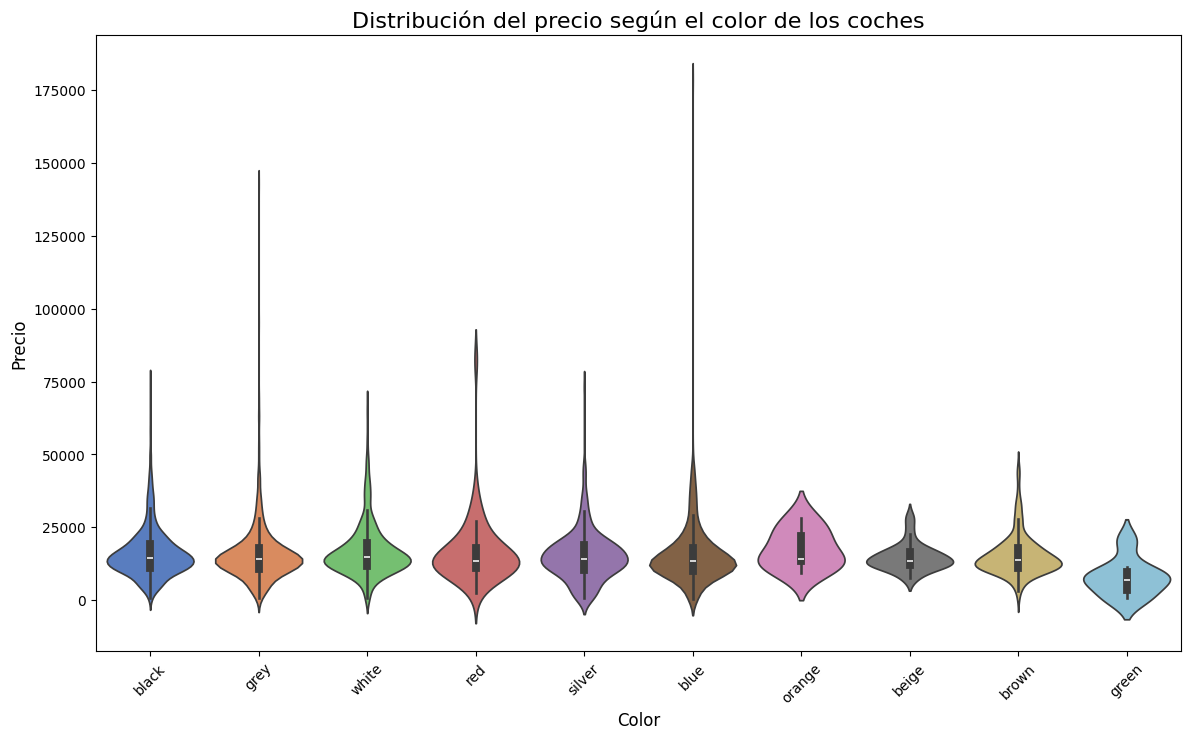

In [400]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Crear un gráfico de violín
sns.violinplot(data=bmw_clean2, x='color', y='precio', palette='muted')

# Añadir títulos y etiquetas
plt.title('Distribución del precio según el color de los coches', fontsize=16)
plt.xlabel('Color', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


1. **Variedad en precios según el color:**
  - Los colores "blue" y "grey" presentan una mayor dispersión de precios, con colas más largas, lo que indica que hay modelos de ambos colores en rangos de precio más altos.
  - Los colores como "beige", "green", y "orange" tienen una menor dispersión y parecen estar asociados con un rango de precios más limitado.
2. **Colores con precios más bajos:**
  - Colores como "beige", "orange", y "brown" parecen estar concentrados en precios más bajos, ya que tienen violines más estrechos y centrados hacia la parte inferior de la escala.
3. **Colores con precios más altos:**
  - Los coches "blue" y "silver" no solo tienen una mayor dispersión, sino que también presentan medianas más altas, lo que podría indicar que los vehículos de estos colores son más costosos, en promedio.
4. **Preferencia y exclusividad de colores:**
  - Colores menos comunes como "beige" y "green" pueden estar asociados con una menor oferta o una mayor especificidad de modelos, pero no parecen estar vinculados a precios particularmente altos.
  - Colores más comunes como "black" y "grey" tienen una distribución amplia y mediana cercana al rango medio de precios.
5. **Extremos de precio:**
  - Aunque hay valores atípicos (outliers) hacia precios muy altos, como en "silver" y "blue", probablemente estén relacionados con modelos de lujo o de alta gama.

**Interpretación comercial:**
Los colores como "blue" y "silver" podrían asociarse a coches premium o más populares en segmentos de alto precio.
Colores como "orange", "beige", o "brown" podrían representar coches menos demandados o de menor valor percibido.


## 6. Transformación de categóricas a numéricas.



Vamos a transformar en numéricas el resto de variables categóricas:
- tipo_gasolina
- color
- grupo_modelo

In [401]:
bmw_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   km                    4817 non-null   float64
 1   potencia              4817 non-null   float64
 2   tipo_gasolina         4817 non-null   object 
 3   color                 4817 non-null   object 
 4   volante_regulable     4817 non-null   bool   
 5   aire_acondicionado    4817 non-null   bool   
 6   camara_trasera        4817 non-null   bool   
 7   elevalunas_electrico  4817 non-null   bool   
 8   bluetooth             4817 non-null   bool   
 9   gps                   4817 non-null   bool   
 10  alerta_lim_velocidad  4817 non-null   bool   
 11  precio                4817 non-null   float64
 12  antiguedad            4817 non-null   float64
 13  grupo_modelo          4817 non-null   object 
 14  km_por_año            4817 non-null   float64
 15  antiguedad_potencia   4817

In [402]:
bmw_clean2['grupo_modelo'].value_counts()

grupo_modelo
Sedán pequeño      1668
Sedán mediano      1061
SUV/4x4            1060
Compacto            569
Otros               248
Coupé/Deportivo     102
Sedán premium        78
Familiar/Van         31
Name: count, dtype: int64

Vamos a usar la técnica de One-Hot Encoding ya que tipo_gasolina, color y grupo_modelo no tienen un orden lógico.

In [403]:
#Hacemos otra copia:
bmw_clean3 = bmw_clean2.copy()

In [404]:
# Usar One-Hot Encoding para las variables categóricas
bmw_onehotencoding = pd.get_dummies(bmw_clean3, columns=['tipo_gasolina', 'color', 'grupo_modelo'], drop_first=True)

# Ver las primeras filas del dataframe resultante
bmw_onehotencoding.head()


,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,...,color_red,color_silver,color_white,grupo_modelo_Coupé/Deportivo,grupo_modelo_Familiar/Van,grupo_modelo_Otros,grupo_modelo_SUV/4x4,grupo_modelo_Sedán mediano,grupo_modelo_Sedán pequeño,grupo_modelo_Sedán premium
0,140411.0,100.0,True,True,False,True,True,True,True,11300.0,...,False,False,False,False,False,False,False,False,False,False
1,13929.0,317.0,True,True,False,False,True,True,True,69700.0,...,False,False,False,True,False,False,False,False,False,False
2,183297.0,120.0,False,False,False,True,False,True,False,10200.0,...,False,False,True,False,False,False,False,False,True,False
3,128035.0,135.0,True,True,False,True,True,True,False,25100.0,...,True,False,False,True,False,False,False,False,False,False
4,97097.0,160.0,True,True,False,False,True,True,True,33400.0,...,False,True,False,False,False,True,False,False,False,False


In [405]:
bmw_onehotencoding.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   km                            4817 non-null   float64
 1   potencia                      4817 non-null   float64
 2   volante_regulable             4817 non-null   bool   
 3   aire_acondicionado            4817 non-null   bool   
 4   camara_trasera                4817 non-null   bool   
 5   elevalunas_electrico          4817 non-null   bool   
 6   bluetooth                     4817 non-null   bool   
 7   gps                           4817 non-null   bool   
 8   alerta_lim_velocidad          4817 non-null   bool   
 9   precio                        4817 non-null   float64
 10  antiguedad                    4817 non-null   float64
 11  km_por_año                    4817 non-null   float64
 12  antiguedad_potencia           4817 non-null   float64
 13  mes_vent

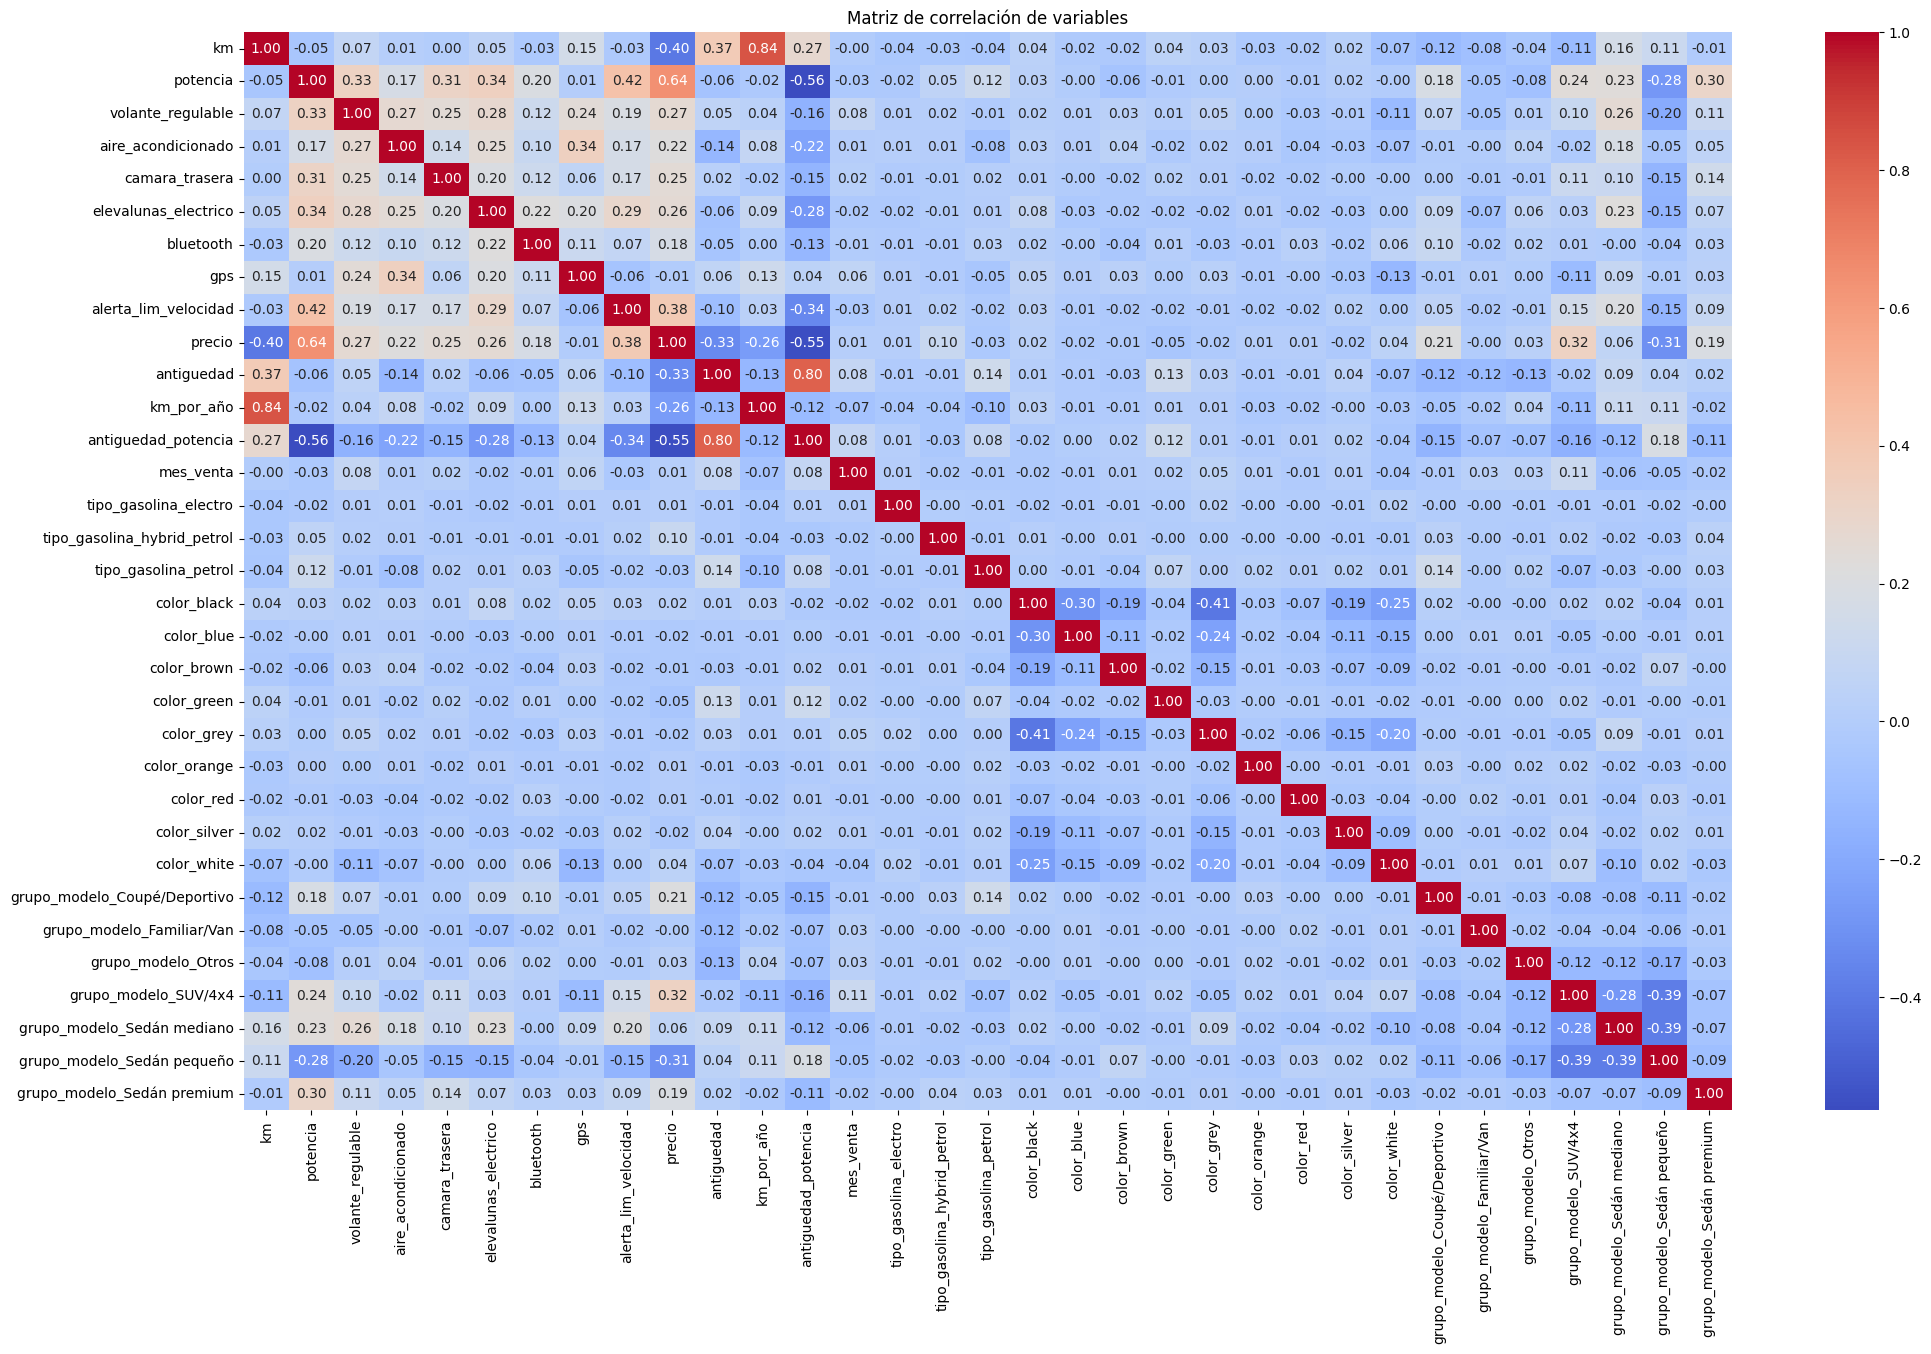

In [406]:
# Calcular la matriz de correlación 
correlation_matrix = bmw_onehotencoding.corr()

plt.figure(figsize=(24, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación de variables')
plt.show()


Observando la matriz resultante, tenemos las siguientes observaciones con respecto al precio:
- El kilometraje muestra una correlación negativa considerable (-0.40). Es decir, a mayor kilometraje, menor es el precio del coche.

- La potencia tiene una correlación positiva considerable (0.64). A mayor potencia, mayor precio del coche.

- Si observamos las variables referentes a los extras del coche (volante_regulable, aire_acondicionado, camara_trasera, elevalunas_electrico,bluetooth, gps y alerta_lim_velocidad), podemos concluir que el hecho de que el coche tenga alguno de estos extras (excepto gps) podría hacer que el precio del coche aumente ya que tienen una correlación positiva entre 0.17 (bluetooth) y 0.38 (alerta_lim_velocidad). El gps parece no guardar relación.
Esto que comentamos es lo lógico.

- Por comentar algo referente al combustible, destaca la leve correlación positiva de la variable tipo_gasolina_hybrid_petrol de 0.10 con respecto a los demás tipos de combustible. Los coches híbridos suelen tener un precio algo más alto que los que tienen otro tipo de combustible.

- La antigüedad tiene una correlación negativa similar a la de antigüedad (-0.33), indicando que los coches más antiguos tienden a ser más baratos.

- La variable “grupo_modelo_SUV/4X4” tiene una correlación positiva con el precio (0.32), lo que sugiere que este tipo de vehículo suele tener precios más altos que los demás.

- La variable "grupo_modelo_Coupé/Deportivo" tiene una correlación positiva (0,21), lo que sugiere que este tipo de vehículos suelen tener precios más altos que los demás.

- La variable "grupo_modelo_Sedan premium" tiene una correlación positiva (0,19), lo que sugiere que este tipo de vehículos suelen tener precios más altos que los demás.

- La variable “grupo_modelo_Sedán pequeño” muestra una correlación negativa con el precio (-0.31), lo que sugiere que los sedanes pequeños suelen ser más económicos que los demás.

Las variables de colores no tienen una correlación destacada con el precio y eliminarlas es una opción razonable. Sin embargo, antes de eliminar definitivamente las variables de colores, se podría:
- Realizar un análisis de importancia de características para ver si, aunque la correlación sea baja, el modelo aún considera que las variables de color son importantes (esto se puede hacer con modelos como Random Forest o XGBoost).
- Probar el modelo tanto con las variables de color como sin ellas y comparar el rendimiento.


In [407]:
#reset index
bmw_onehotencoding = bmw_onehotencoding.reset_index(drop=True)

In [408]:
bmw_onehotencoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   km                            4817 non-null   float64
 1   potencia                      4817 non-null   float64
 2   volante_regulable             4817 non-null   bool   
 3   aire_acondicionado            4817 non-null   bool   
 4   camara_trasera                4817 non-null   bool   
 5   elevalunas_electrico          4817 non-null   bool   
 6   bluetooth                     4817 non-null   bool   
 7   gps                           4817 non-null   bool   
 8   alerta_lim_velocidad          4817 non-null   bool   
 9   precio                        4817 non-null   float64
 10  antiguedad                    4817 non-null   float64
 11  km_por_año                    4817 non-null   float64
 12  antiguedad_potencia           4817 non-null   float64
 13  mes

# Modelling

Despues de limpiar los datos, procedemos a crear nuestro modelo

In [409]:
bmw_modelo = bmw_onehotencoding.copy()

In [410]:
 X = bmw_modelo.drop(columns=['precio'], axis=1)  # Todas las columnas excepto la columna 'precio'
 y = bmw_modelo['precio']  # La variable objetivo, 'precio'


In [411]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    

#Para que la división de los datos **sea siempre igual**, 
# usamos el parámetro 'random_state'. Es un numero cualquiera, no importa! solo no dejamos que sea al azar.
#Dividimos los datos en tres conjuntos:

 # - **70% para entrenamiento** (`train`): aquí es donde el modelo aprende.
 # - **15% para validación** (`valid`): usamos este conjunto para ajustar y elegir el mejor modelo sin “hacer trampa”.
#- **15% para prueba** (`test`): se usa al final para evaluar cómo funcionará el modelo con datos nuevos que nunca ha visto.

#*temp*(30%) seria (el conjunto de datos 'x_val'(15%) y 'x_test'(15%))

## Primer Modelo: LinearRegression
Empezaremos con un  modelo bastante sencillo, que intenta encontrar relacion directa entre las caracteristicas del coche y su precio.

En este proyecto estamos ante un problema de regresión, porque queremos predecir el **precio**, que es una cantidad numérica.

Primero probaremos este modelo básico para entender cómo funciona y evaluar su rendimiento. Más adelante, probaremos modelos más avanzados que puedan mejorar nuestras predicciones.


In [412]:
##Modelo 1 LinealRegression 
from sklearn.linear_model import LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()), ## Normalizamos variables numericas(mejora el rendimiento del modelo )
    ('regressor', LinearRegression())
])


In [414]:
pipeline.fit(X_train, y_train)



,steps,"[('scaler', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [ ]:
y_pred = pipeline.predict(X_test) 


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R2: {r2:.3f}") # Mide cuanto explica el modelo la variabilidad del target (si se acerca a 1 es bueno)
print(f"RMSE: {rmse:.3f}")#Error promedio con penalización alta a errores grandes.(misma unidad del target)
print(f"MAE: {mae:.3f}")#Error promedio sin penalización a errores grandes.



R2: 0.715
RMSE: 4361.671
MAE: 2956.981


-R2: El modelo explica el 71.5% de la variación del precio. Lo cual es bastante bueno 
-RMSE:El RMSE fue aproximadamente **4362 unidades monetarias** mostrando la magnitud típica del error.
-El MAE obtenido fue de aproximadamente **2957 unidades monetarias**.

El RMSE mayor que el MAE indica que existen errores grandes puntuales.
Podría ser útil probar modelos más avanzados, como un RandomForest

In [420]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42, n_estimators=100)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest - R2: {r2_rf:.3f}")
print(f"Random Forest - RMSE: {rmse_rf:.3f}")
print(f"Random Forest - MAE: {mae_rf:.3f}")


Random Forest - R2: 0.731
Random Forest - RMSE: 4236.494
Random Forest - MAE: 2754.726


Random Forest mejora un poco la predicción respecto a la regresión lineal, con errores más pequeños y mejor ajuste.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Define el modelo
rf = RandomForestRegressor(random_state=42)

# Métrica RMSE personalizada para cross_val_score
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Cross-validation para R2 (por defecto 'r2' en cross_val_score)
r2_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print(f"R2 promedio (5-fold): {np.mean(r2_scores):.3f}")

# Cross-validation para RMSE (usando la métrica personalizada)
rmse_scores = cross_val_score(rf, X, y, cv=5, scoring=rmse_scorer)
print(f"RMSE promedio (5-fold): {np.mean(rmse_scores):.3f}")


R2 promedio (5-fold): 0.644


c:\Users\mixxt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:971: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\mixxt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 152, in __call__
    score = scorer._score(
        cached_call, estimator, *args, **routed_params.get(name).score
    )
  File "c:\Users\mixxt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mixxt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "c:\Users\mixxt\AppData

RMSE promedio (5-fold): nan


c:\Users\mixxt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:971: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\mixxt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 152, in __call__
    score = scorer._score(
        cached_call, estimator, *args, **routed_params.get(name).score
    )
  File "c:\Users\mixxt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mixxt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "c:\Users\mixxt\AppData

In [ ]:
# Transformación del target en base logaritmica ya que los precios esran sesgados(encontramos coches con precios muy bajos, otros muy altos, y los mas populares)
y_train_log = np.log(y_train + 1)
y_val_log = np.log(y_val + 1)


In [ ]:
!pip install --upgrade scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
print(X_train.shape)
print(y_train.shape)

(3857, 29)
(3857,)


In [ ]:
# Creamos el modelo 
modelo = RandomForestRegressor(n_estimators=50, max_depth=6, random_state=42)

#Entrenamos el modelo 
modelo.fit(X_train, y_train_log)

y_pred_log = modelo.predict(X_val) #Predicciones en escala logaritmica 


#y_pred = np.exp(y_pred_log) - 1 #Invertimos la transformacion para obtener resultados reales 

# Evaluar con el target original
mse_log = mean_squared_error(y_train_log, y_pred_log)
rmse_log = np.sqrt(mse_log)
print(f"RMSE en log-scale: {rmse_log:.4f}")



ValueError: Found input variables with inconsistent numbers of samples: [3857, 723]

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
#Visalizamos nuestro randomForest
dot_data = export_graphviz(
    decision_tree = modelo.estimators_[-1],
    out_file=None,
    feature_names=X_train.columns,
    filled=True,
    impurity=True,
    proportion=True,
    rotate=True,
    rounded=True
)

In [ ]:
from sklearn.tree import export_graphviz

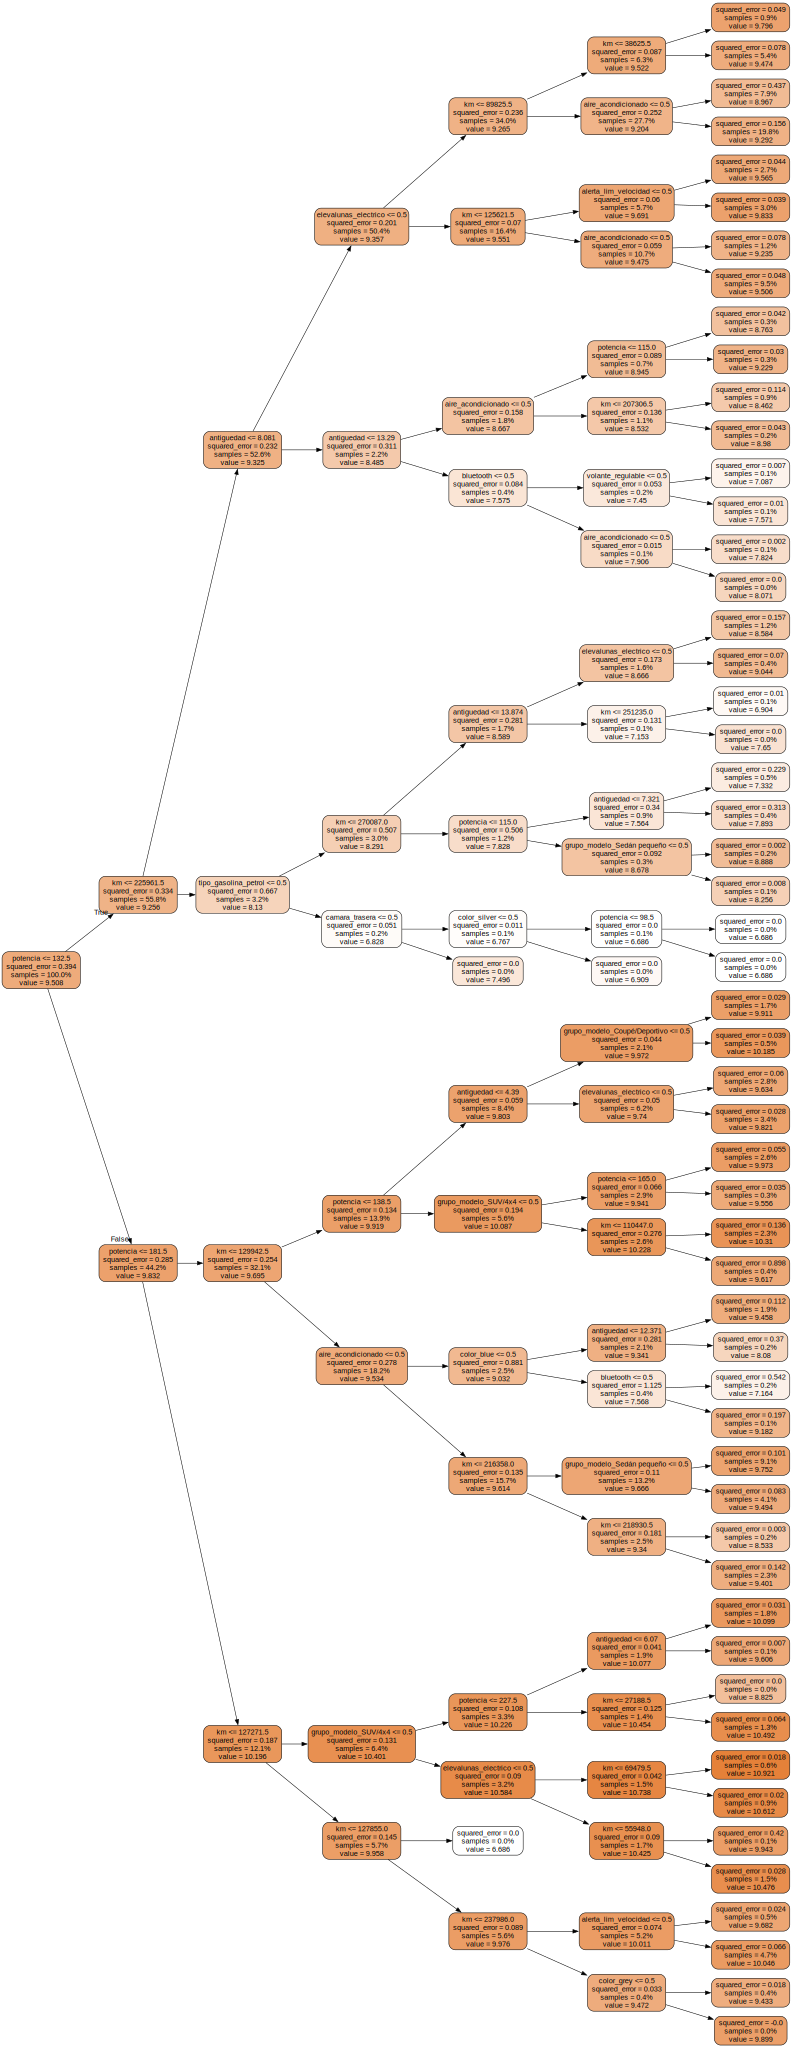

In [ ]:
import graphviz
graphviz.Source(dot_data)

potencia                        5.251196e-01
km                              2.614840e-01
antiguedad                      8.808116e-02
grupo_modelo_SUV/4x4            3.233970e-02
elevalunas_electrico            2.268878e-02
aire_acondicionado              1.462658e-02
grupo_modelo_Sedán pequeño      1.147568e-02
color_blue                      9.057322e-03
gps                             6.509040e-03
volante_regulable               5.871787e-03
color_grey                      5.573488e-03
alerta_lim_velocidad            3.764378e-03
grupo_modelo_Sedán mediano      3.330610e-03
tipo_gasolina_petrol            2.350431e-03
camara_trasera                  1.516478e-03
grupo_modelo_Coupé/Deportivo    1.475676e-03
grupo_modelo_Sedán premium      1.212771e-03
bluetooth                       9.206213e-04
color_black                     7.253981e-04
color_silver                    6.933982e-04
grupo_modelo_Otros              4.884388e-04
color_white                     3.204124e-04
color_red 

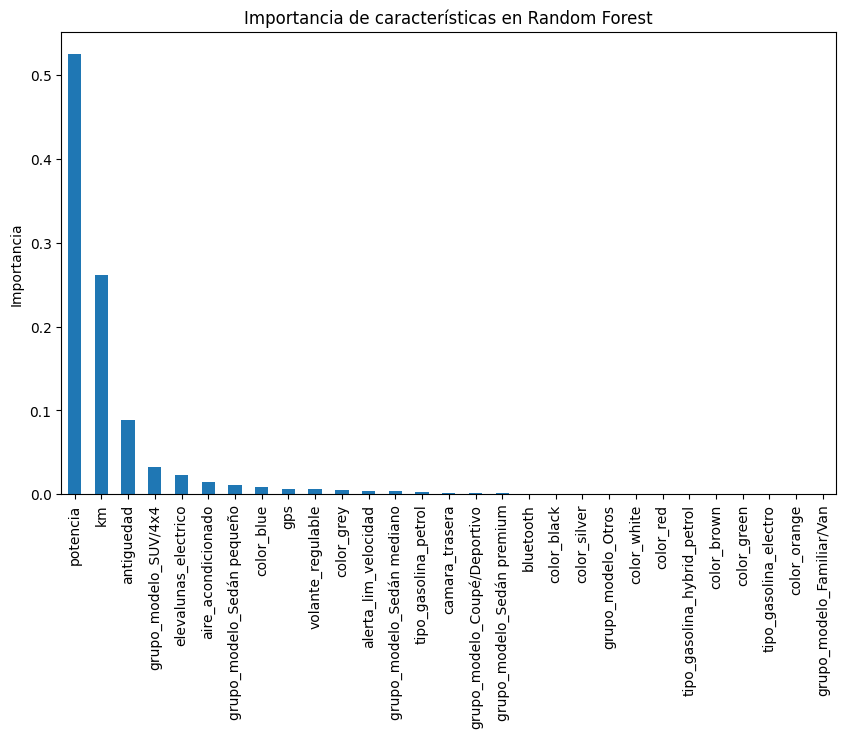

In [ ]:
# Suponiendo que ya tienes tu modelo entrenado, por ejemplo:
# modelo = RandomForestRegressor(n_estimators=50, max_depth=6, random_state=42)
# modelo.fit(X_train, y_train)

# Obtener la importancia de las características
importancias = modelo.feature_importances_

# Crear un DataFrame para visualizar mejor
import pandas as pd
import matplotlib.pyplot as plt

feat_importances = pd.Series(importancias, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=False)

# Mostrar las importancias en pantalla
print(feat_importances)

# Graficar la importancia de cada característica
plt.figure(figsize=(10,6))
feat_importances.plot(kind='bar')
plt.title('Importancia de características en Random Forest')
plt.ylabel('Importancia')
plt.show()


In [ ]:
importancias = pd.Series(modelo.feature_importances_, index=X_train.columns)

top_features = importancias[importancias > 0.01].index.tolist()

X_train_top = X_train[top_features]
X_val_top = X_val[top_features]


In [ ]:
modelo_final = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_final.fit(X_train_top, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
dot_data = export_graphviz(
    decision_tree = modelo_final.estimators_[-1],
    out_file=None,
    feature_names=X_train_top.columns,
    filled=True,
    impurity=True,
    proportion=True,
    rotate=True,
    rounded=True
)## Modelo solo con las features importances, 

In [ ]:
y_pred = modelo_final.predict(X_val_top)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = modelo_final.predict(X_val_top)  # predicciones en validación

mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

MSE: 23775593.84
RMSE: 4876.02
MAE: 2933.72
R2: 0.72


In [ ]:
# Evaluación del rendimiento del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Mostrar las métricas de evaluación
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


NameError: name 'y_pred' is not defined

1. MAE (Mean Absolute Error): 0.0184
- El MAE mide la diferencia promedio entre los valores reales y las predicciones, sin considerar la dirección del error. Un valor bajo, como este, indica que el modelo está realizando predicciones bastante precisas.
2. MSE (Mean Squared Error): 0.0008
- El MSE es similar al MAE, pero penaliza más los errores grandes debido a que eleva al cuadrado las diferencias. Al ser un valor tan bajo, indica que los errores son pequeños en general.
3. RMSE (Root Mean Squared Error): 0.0279
- El RMSE es simplemente la raíz cuadrada del MSE, y tiene la ventaja de estar en la misma escala que la variable objetivo (precio). Un valor de RMSE de 0.0279 sugiere que el modelo está bastante ajustado, ya que el error promedio por predicción es pequeño.

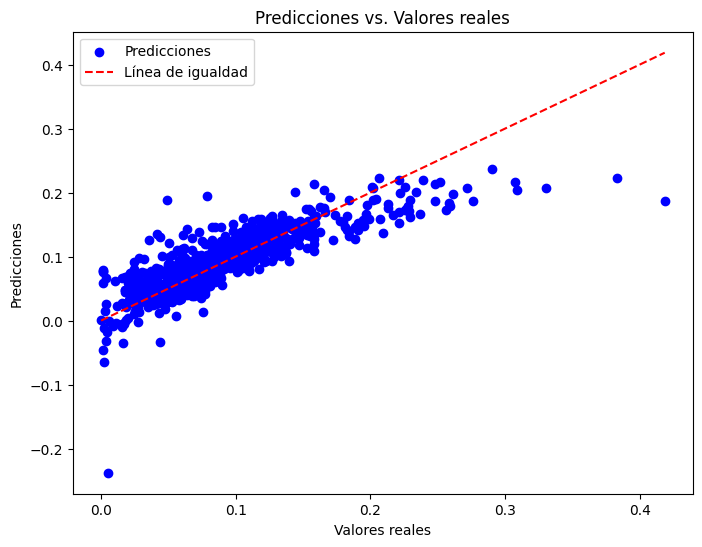

In [ ]:
# Visualizar las predicciones con línea de referencia
plt.figure(figsize=(8, 6))

# Graficar los puntos reales vs predicciones
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')

# Añadir la línea de igualdad
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea de igualdad')

# Etiquetas y título
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores reales')
plt.legend()

# Mostrar el gráfico
plt.show()
